**t-tests to compare GRN and velocity results.**

In [1]:
import os
import sys

import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scvelo as scv
from scipy import stats
from scipy.sparse import csr_matrix

import celloracle as co

In [2]:
%matplotlib inline

In [3]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

In [4]:
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.set_figure_params('scvelo')  # for beautified visualization

In [5]:
# Load file with GRN info
oracle = co.load_hdf5("./Pancreas_grn_vel.celloracle.oracle")

## GRN vs. Velocity: t-tests

Run a t-test and save it into anndata.

In [6]:
velocity_df = pd.DataFrame(oracle.adata.layers['velocity'], columns = oracle.adata.var.index.values, index=oracle.adata.obs.index.values)
grn_df = pd.DataFrame(oracle.adata.layers['delta_X'], columns = oracle.adata.var.index.values, index=oracle.adata.obs.index.values)

In [7]:
#cluster label per cell
cluster_info = oracle.adata.obs['clusters']

In [8]:
t_df = pd.DataFrame()

for clus in cluster_info.unique():
    _, t_df[clus] = stats.ttest_ind(velocity_df[cluster_info == clus], grn_df[cluster_info == clus])

t_df = t_df.fillna(1)
t_df.index = velocity_df.columns
t_df.head()

Pre-endocrine         Ductal          Alpha  Ngn3 high EP  \
Sntg1   6.216736e-124  2.015209e-170  3.188212e-116       0.00000   
Snhg6    0.000000e+00   1.179039e-42   7.792083e-54       0.00000   
Ncoa2    1.000000e+00   1.000000e+00   1.000000e+00       1.00000   
Sbspon   1.617786e-89   1.330279e-86   1.515613e-50       0.35333   
Ube2w    1.000000e+00   1.000000e+00   1.000000e+00       1.00000   

               Delta           Beta   Ngn3 low EP       Epsilon  
Sntg1   9.560760e-24  9.484187e-228  2.769296e-51  1.545568e-75  
Snhg6   1.037311e-05   3.902949e-10  1.057704e-10  1.489448e-14  
Ncoa2   1.000000e+00   1.000000e+00  1.000000e+00  1.000000e+00  
Sbspon  1.242320e-24   1.251215e-92  2.070332e-10  1.752280e-31  
Ube2w   1.000000e+00   1.000000e+00  1.000000e+00  1.000000e+00

In [9]:
t_scores_df = pd.DataFrame()
t_genes_df = pd.DataFrame()

for clus in cluster_info.unique():
    t_scores_df[clus] = np.asarray(t_df[clus][np.argsort(t_df[clus])])
    t_genes_df[clus] = np.asarray(t_df.index[np.argsort(t_df[clus])])

In [10]:
oracle.adata.uns["rank_grn_vel_genes"] = {}
oracle.adata.uns["rank_grn_vel_genes"] = {
    "names": np.rec.fromarrays(
        [n for n in np.asarray(t_genes_df.T)],
        dtype=[(f"{rn}", "U50") for rn in cluster_info.unique()],
    ),
    "scores": np.rec.fromarrays(
        [n.round(2) for n in np.asarray(t_scores_df.T)],
        dtype=[(f"{rn}", "float32") for rn in cluster_info.unique()],
    ),
}

In [11]:
df = scv.get_df(oracle.adata, 'rank_grn_vel_genes/names')
df.head(5)

Pre-endocrine  Ductal   Alpha Ngn3 high EP      Delta      Beta Ngn3 low EP  \
0        Nfatc2  Prune2  Nfatc2        Sntg1       Actb    Nfatc2      Prdm16   
1          Syt7    Wwc1    Noct        Ppm1b  Trp53inp2  Rap1gap2      Deptor   
2         Apba1    Krt8  Tiparp         Eml4    Slc7a14     Scn3a       Kcnq1   
3          Rfx6   Acyp2   Thbs3        Kcnh8   Rap1gap2     Scn9a      Shank2   
4          Sdk1  Inpp5f  Tspan5        Ddah2     Necab2     Wipf1         Pam   

  Epsilon  
0  Nfatc2  
1   Pycr2  
2    Actb  
3  Rab27a  
4   Wipf1

In [12]:
# Save oracle object.
#oracle.to_hdf5("Pancreas_grn_vel2.celloracle.oracle")

### Most different genes

saving figure to file ./figures/scvelo_Pre-endocrine_different_genes_spliced.png


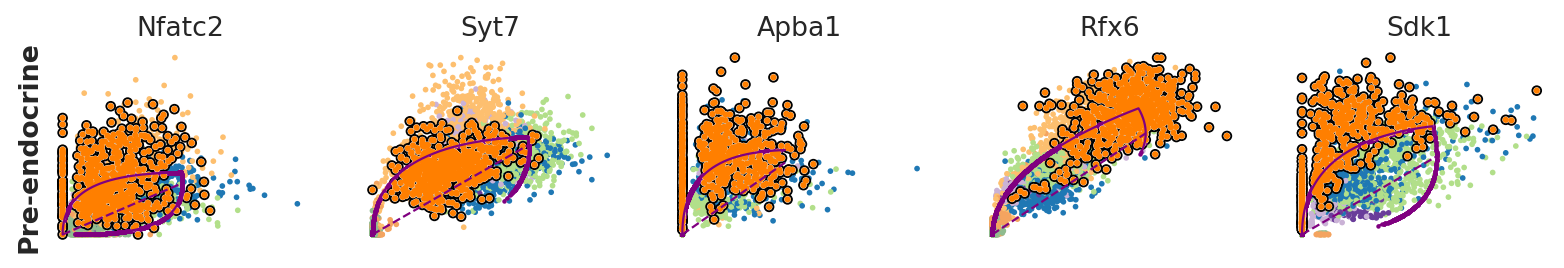

saving figure to file ./figures/scvelo_Ductal_different_genes_spliced.png


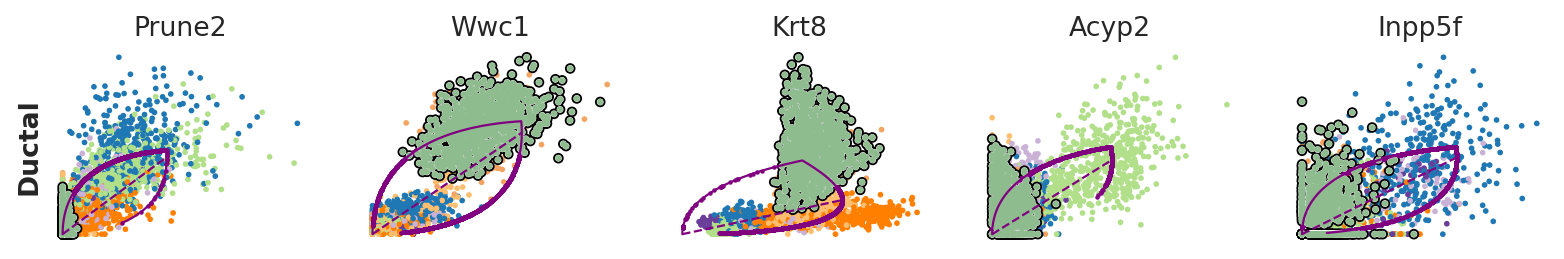

saving figure to file ./figures/scvelo_Alpha_different_genes_spliced.png


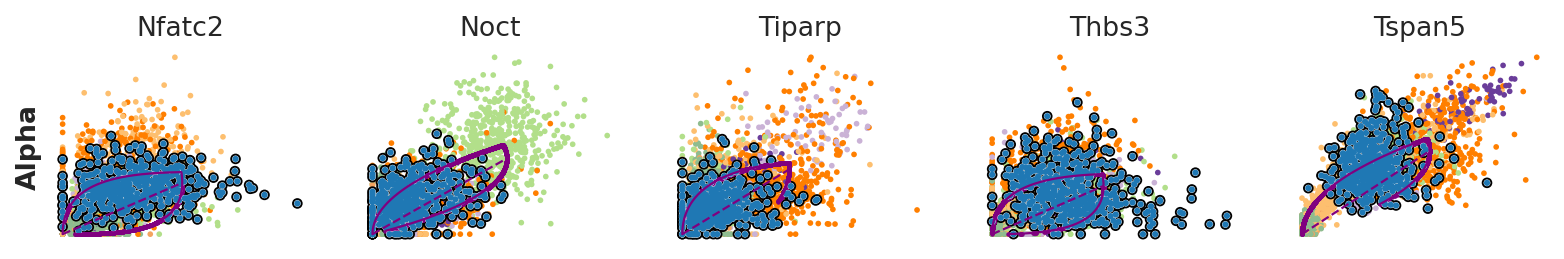

saving figure to file ./figures/scvelo_Ngn3 high EP_different_genes_spliced.png


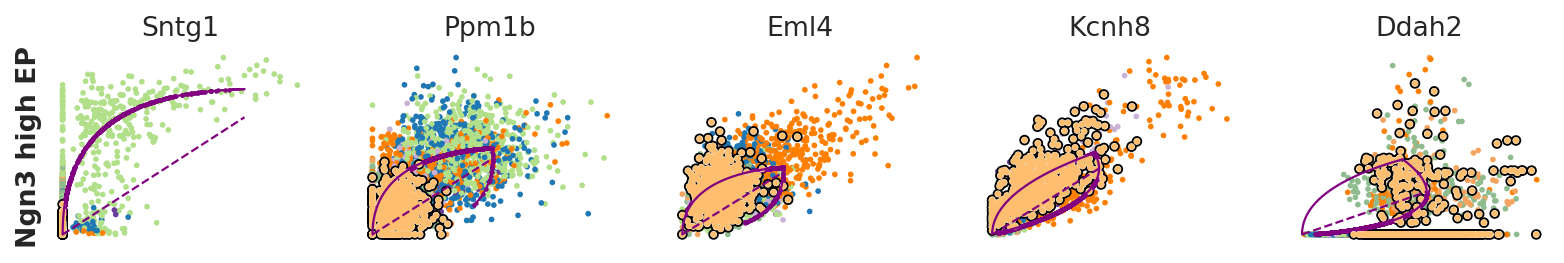

saving figure to file ./figures/scvelo_Delta_different_genes_spliced.png


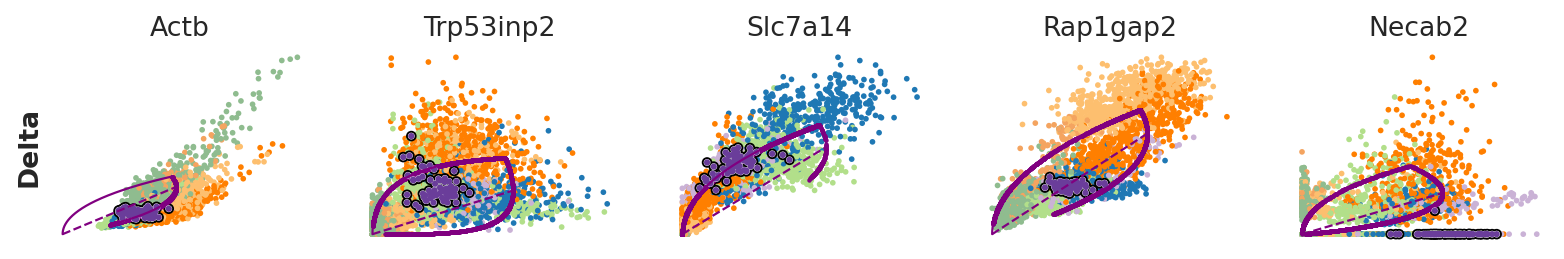

saving figure to file ./figures/scvelo_Beta_different_genes_spliced.png


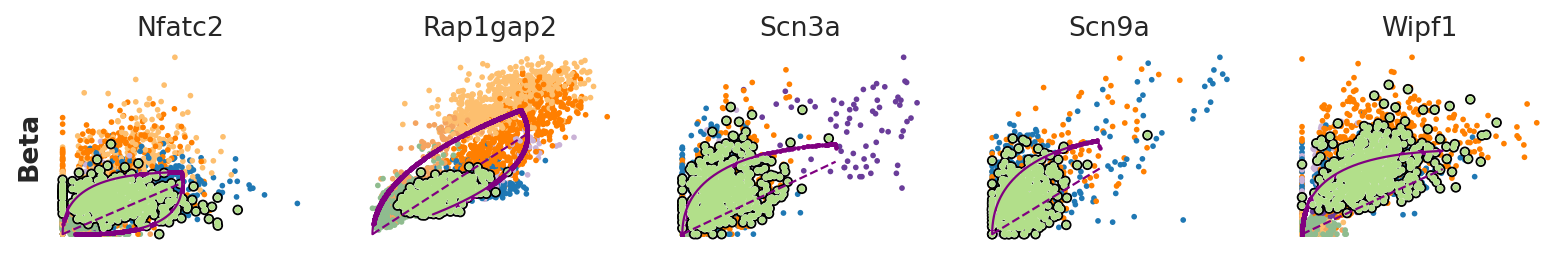

saving figure to file ./figures/scvelo_Ngn3 low EP_different_genes_spliced.png


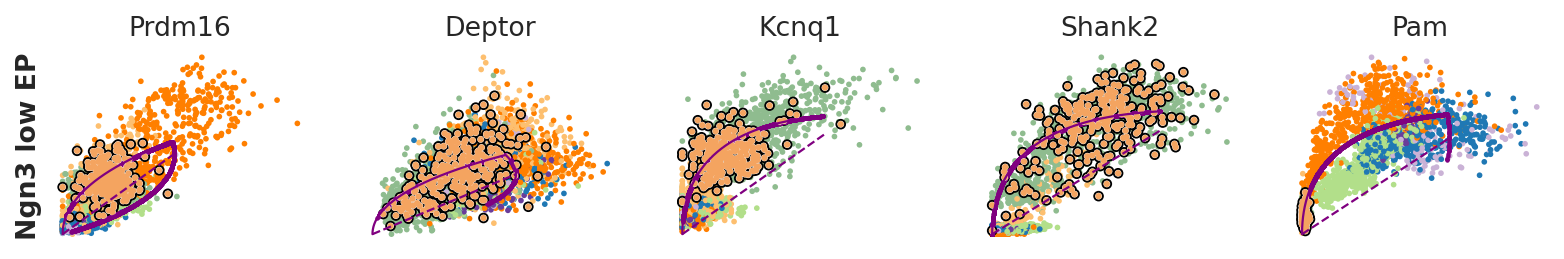

saving figure to file ./figures/scvelo_Epsilon_different_genes_spliced.png


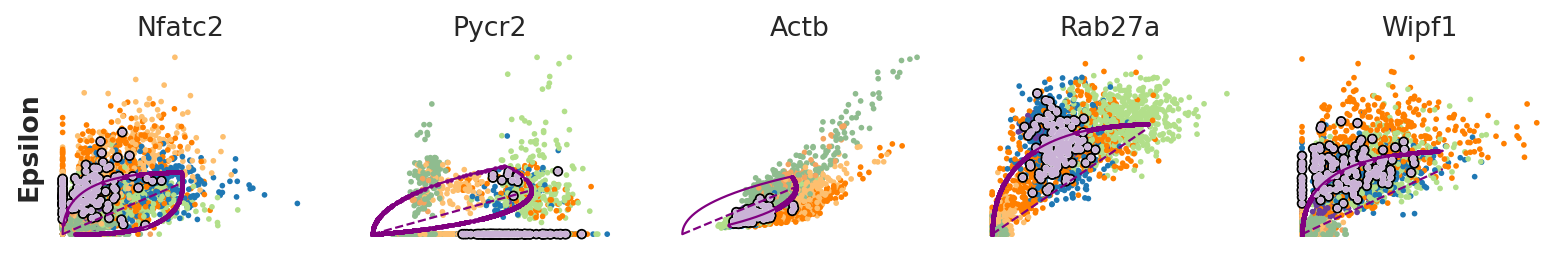

In [13]:
for col in df.columns:
    scv.pl.scatter(oracle.adata, df[col][:5], ylabel=col, add_outline = col, frameon=False, save=str(col)+'_different_genes_spliced.png')

In [14]:
list(df['Pre-endocrine'][:5])

['Nfatc2', 'Syt7', 'Apba1', 'Rfx6', 'Sdk1']

saving figure to file ./figures/scvelo_Pre-endocrine_different_genes_time.png


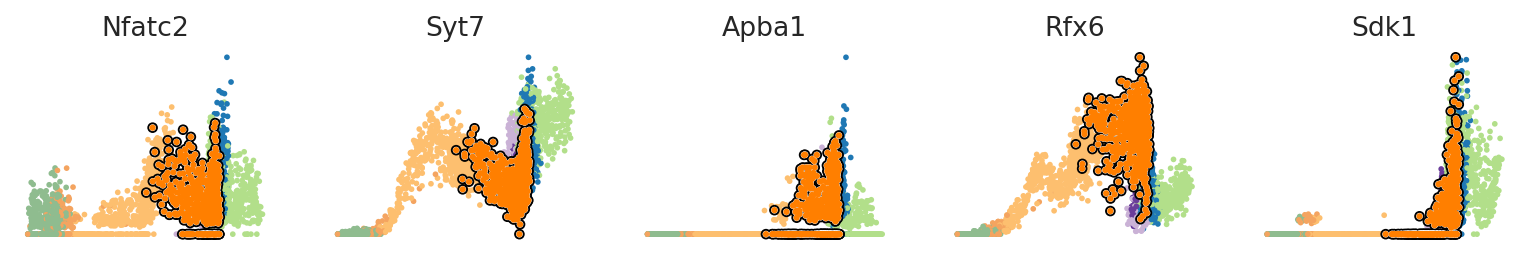

saving figure to file ./figures/scvelo_Ductal_different_genes_time.png


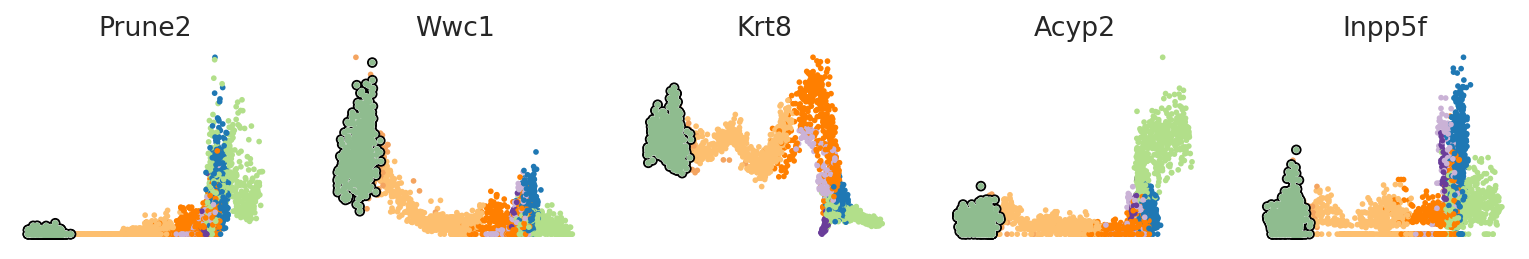

saving figure to file ./figures/scvelo_Alpha_different_genes_time.png


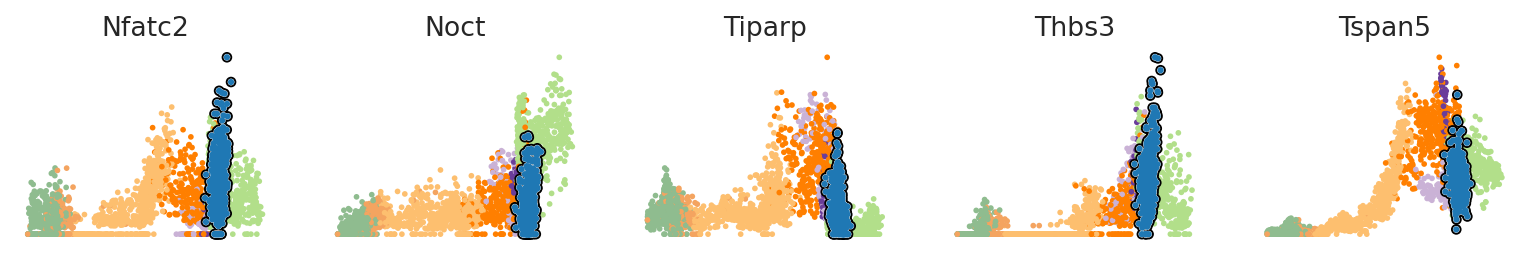

saving figure to file ./figures/scvelo_Ngn3 high EP_different_genes_time.png


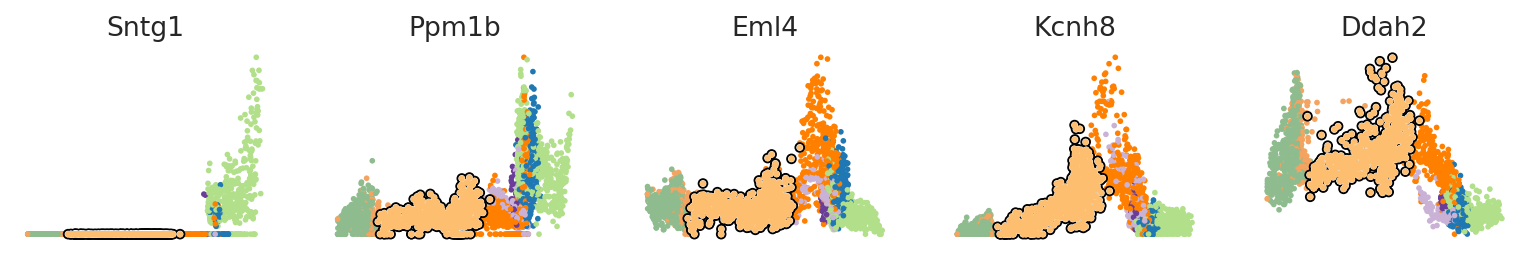

saving figure to file ./figures/scvelo_Delta_different_genes_time.png


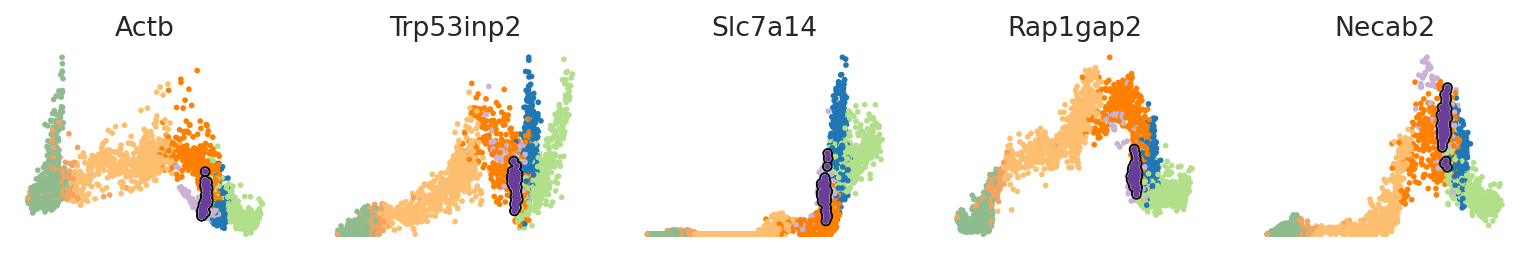

saving figure to file ./figures/scvelo_Beta_different_genes_time.png


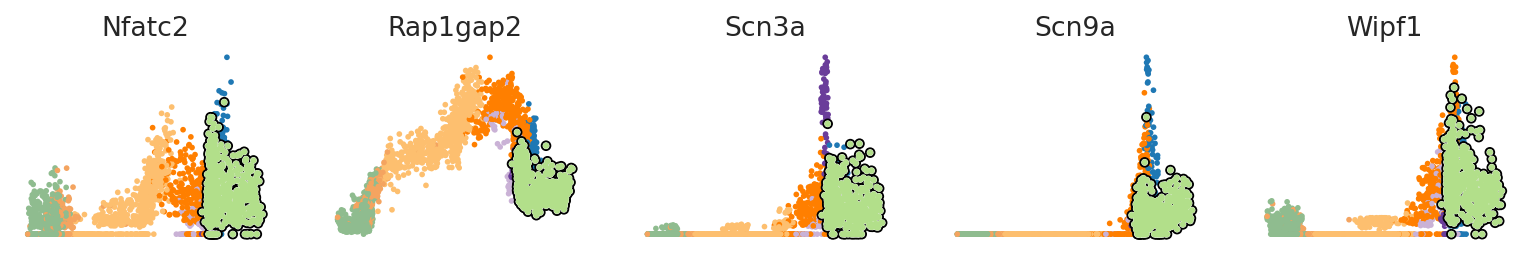

saving figure to file ./figures/scvelo_Ngn3 low EP_different_genes_time.png


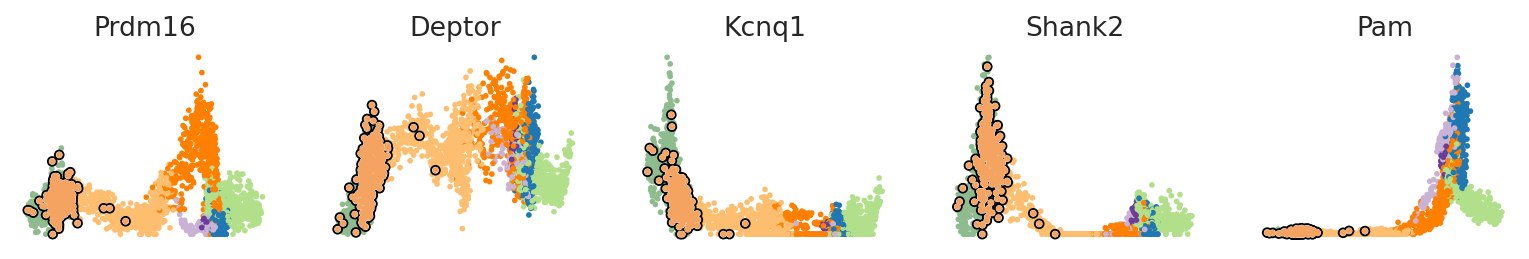

saving figure to file ./figures/scvelo_Epsilon_different_genes_time.png


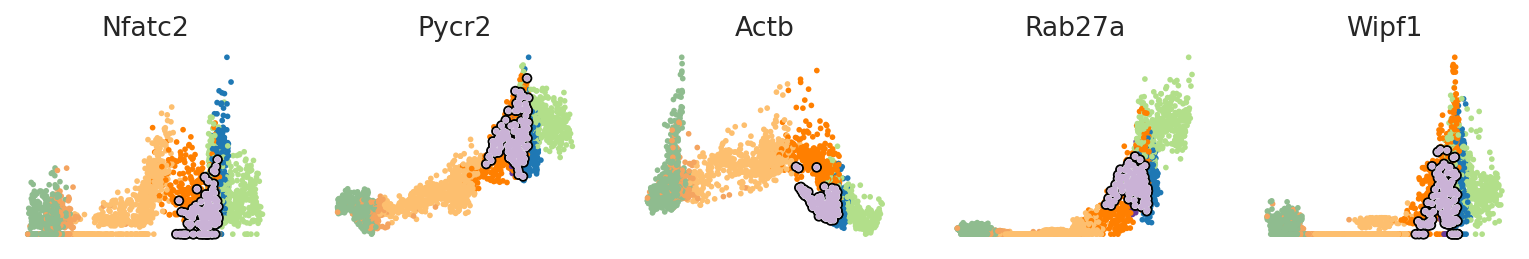

In [15]:
for col in df.columns:
    #scv.pl.scatter(oracle.adata, df[col][:5], ylabel=col, add_outline = col, frameon=False)
    scv.pl.scatter(oracle.adata, x='latent_time', y=list(df[col][:5]), add_outline = col, frameon=False, save=str(col)+'_different_genes_time.png')

In [16]:
#Cluster labels per cell
cluster_info = oracle.adata.obs['clusters']

In [17]:
def plt_grnvel(cluster,variables):
    col=cluster
    fig, axs = plt.subplots(1, 5, figsize=(10,2),constrained_layout=True)

    for i, var in enumerate(variables):
        sc.pl.scatter(oracle.adata[cluster_info == col], x=var, y=var, layers=('velocity','grn','velocity'), color='clusters',show=False,size=30,ax=axs[i])
        min_vel = min(oracle.adata[cluster_info == col][:,var].layers['velocity'])
        max_vel = max(oracle.adata[cluster_info == col][:,var].layers['velocity'])
        min_grn = min(oracle.adata[cluster_info == col][:,var].layers['grn'])
        max_grn = max(oracle.adata[cluster_info == col][:,var].layers['grn'])
        axs[i].plot([0,0],[min(0,min_grn),max(max_grn,0)], 'k:')
        axs[i].plot([min(min_vel,0),max(max_vel,0)],[0,0], 'k:')
        axs[i].set_title(var)
        axs[i].set_xlabel('velocity')
        axs[i].set_ylabel('grn')
        axs[i].get_legend().remove()
        axs[i].get_xaxis().set_ticks([])
        axs[i].get_yaxis().set_ticks([])
    #axs[j,k].axis('off')
#plt.savefig("./figures/top30_grn_vel.png", dpi=150)

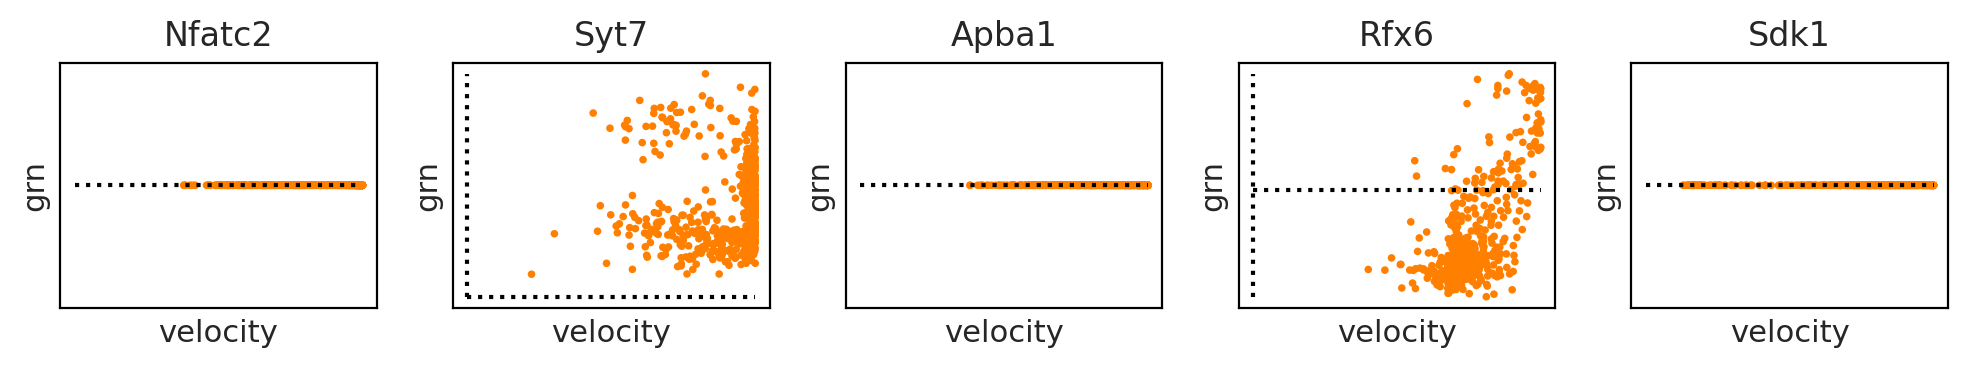

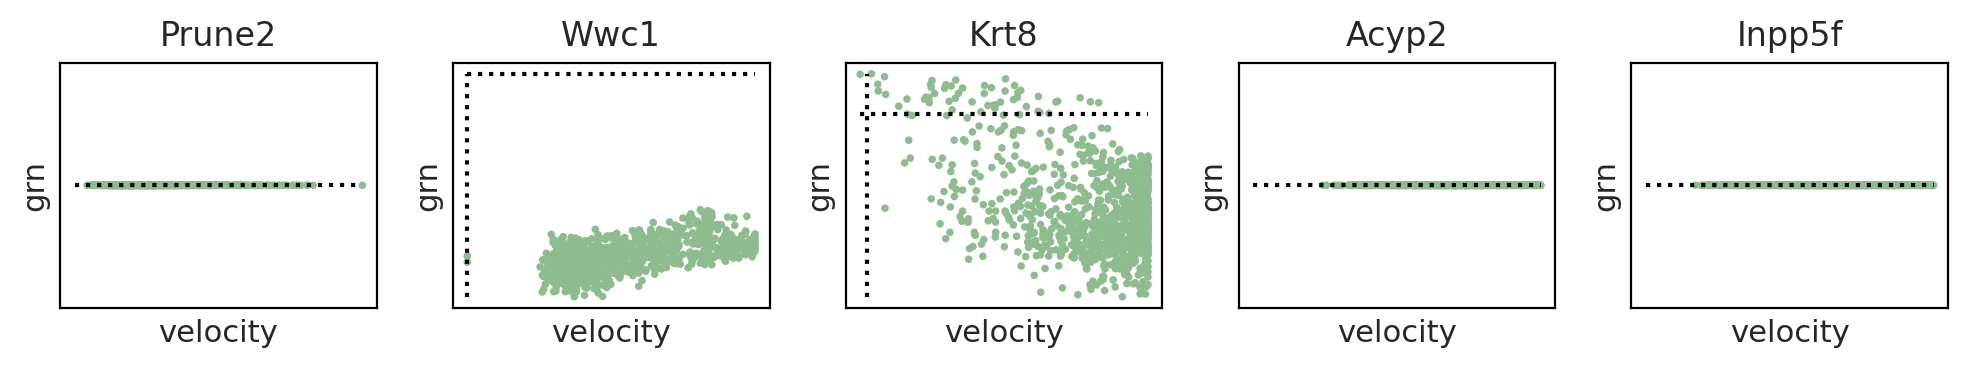

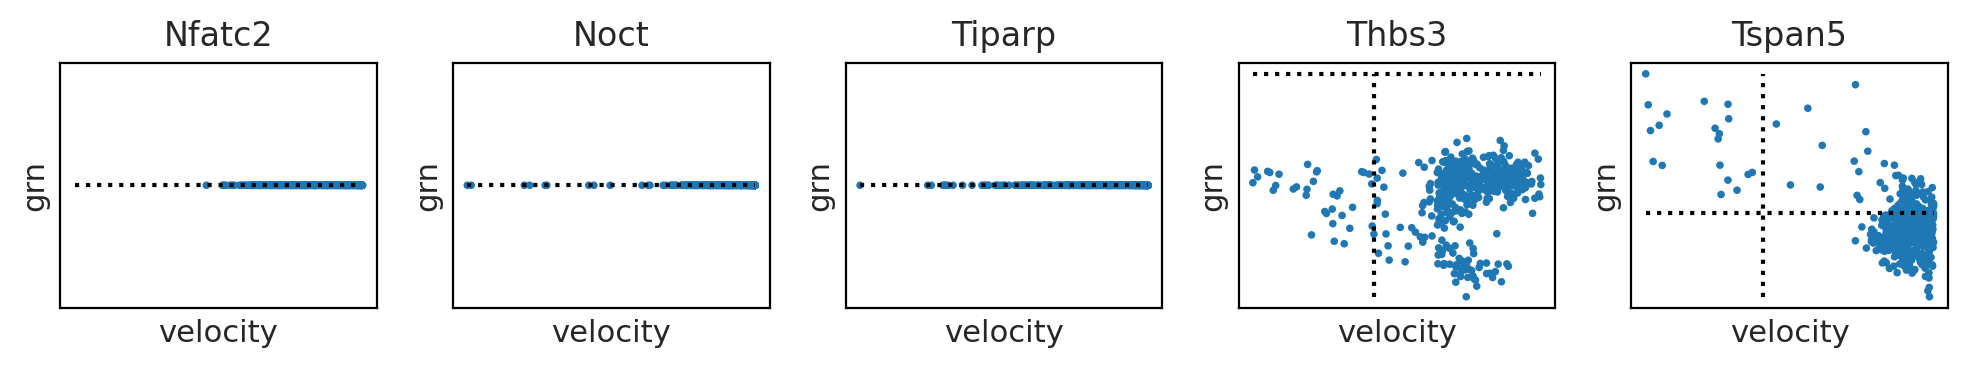

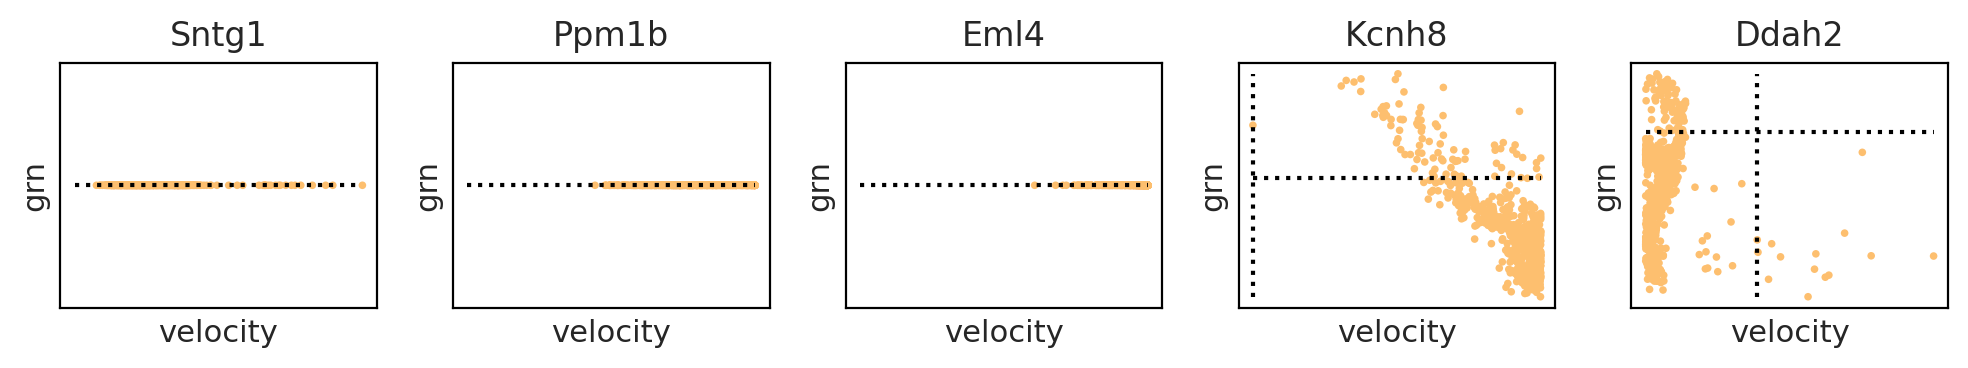

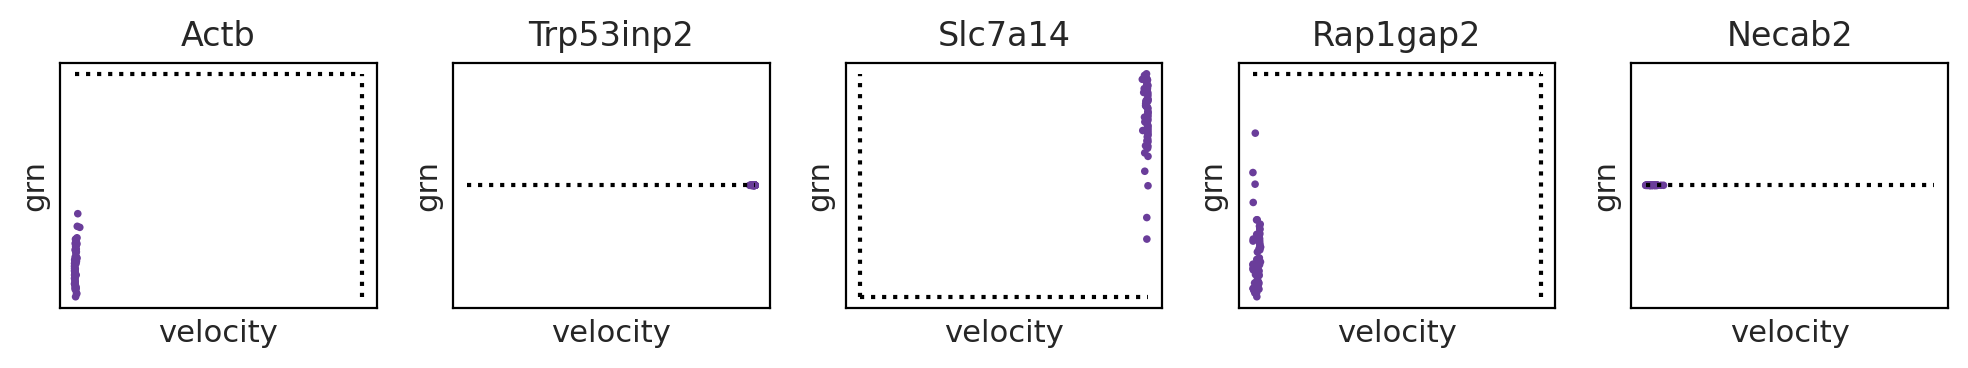

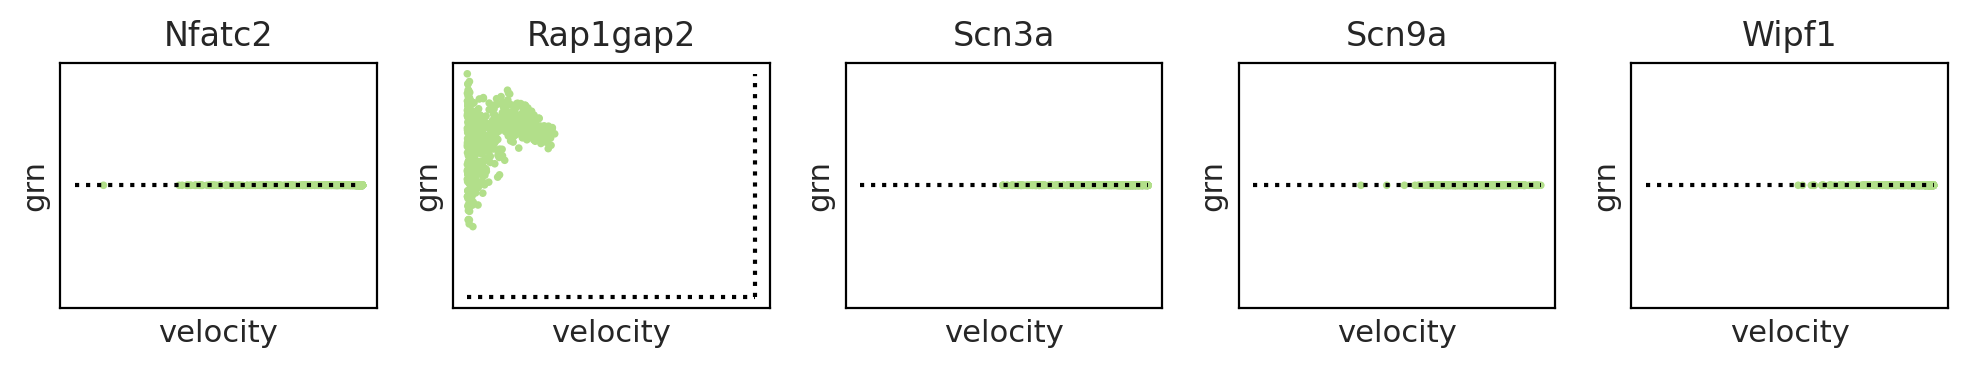

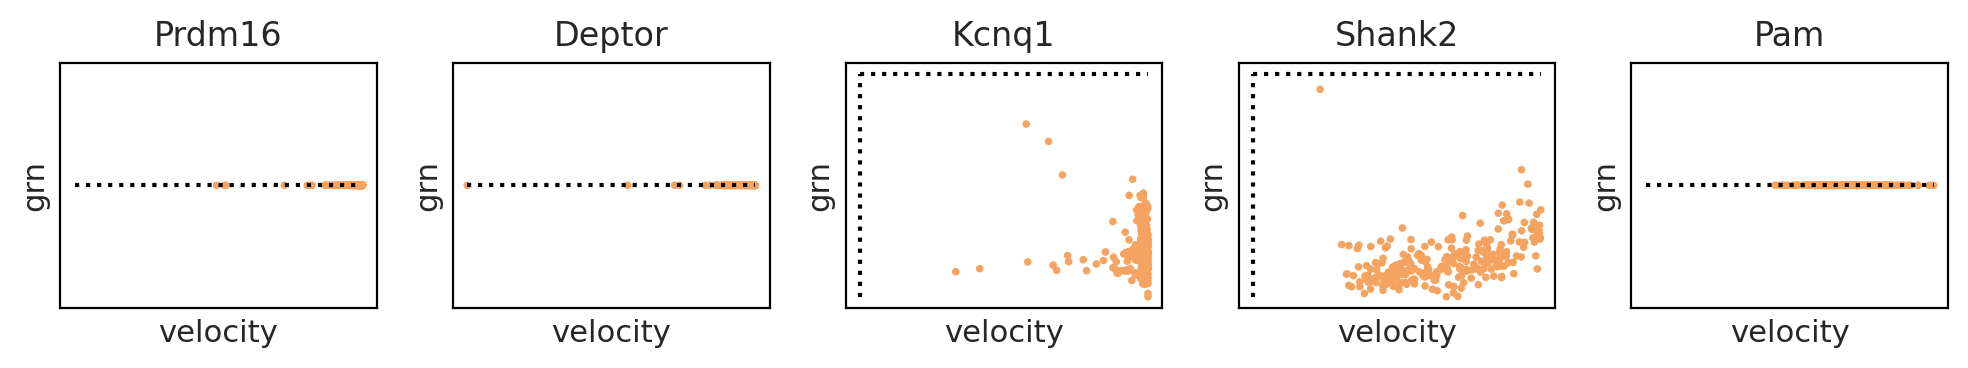

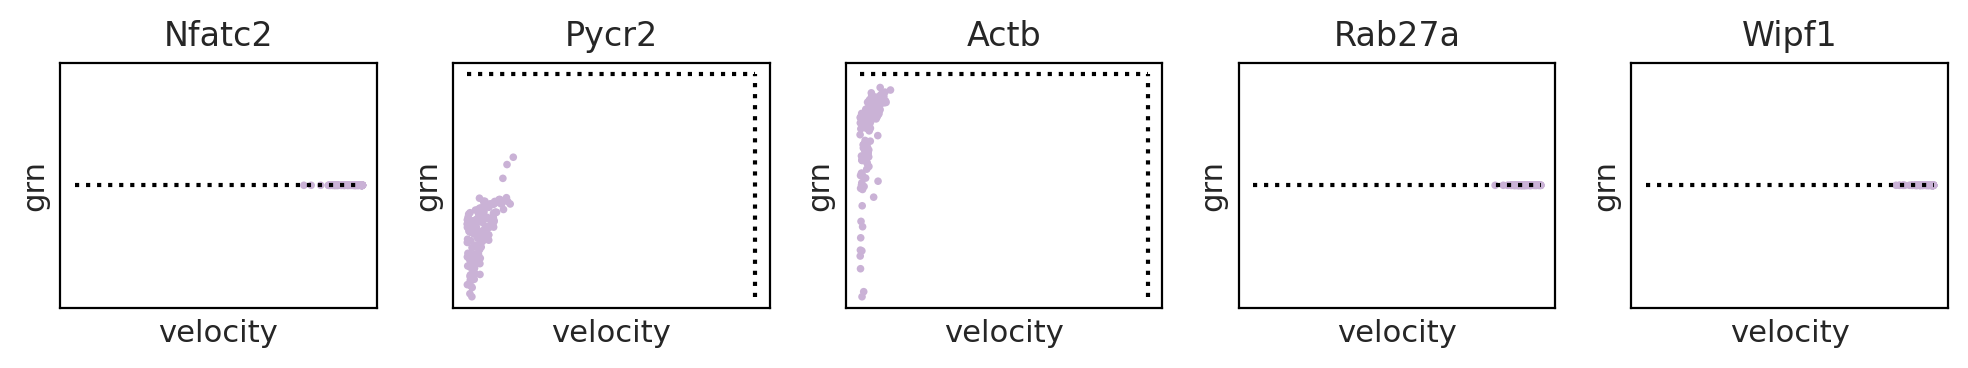

In [18]:
for col in df.columns:
    plt_grnvel(col, df[col][:5])
    plt.savefig('./'+str(col)+'_different_grn_vel.png')

In [19]:
min(oracle.adata[:,'Actb'].layers['velocity'])

ArrayView([-0.79506554])

### Most similar genes

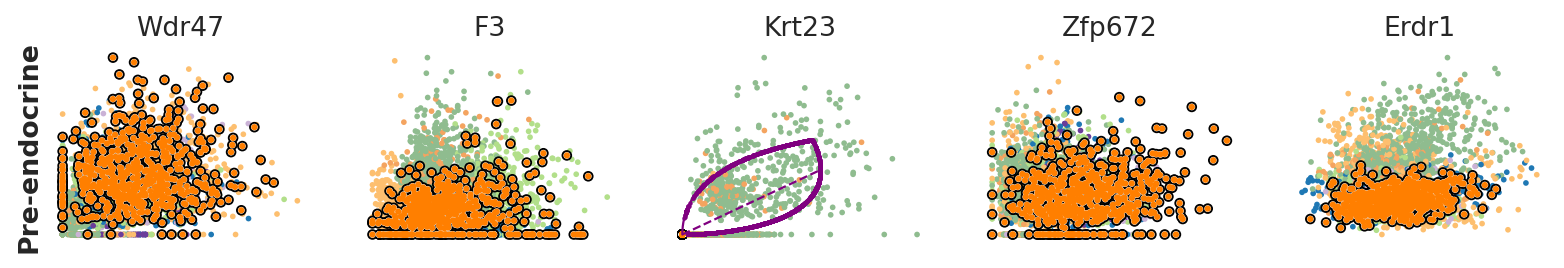

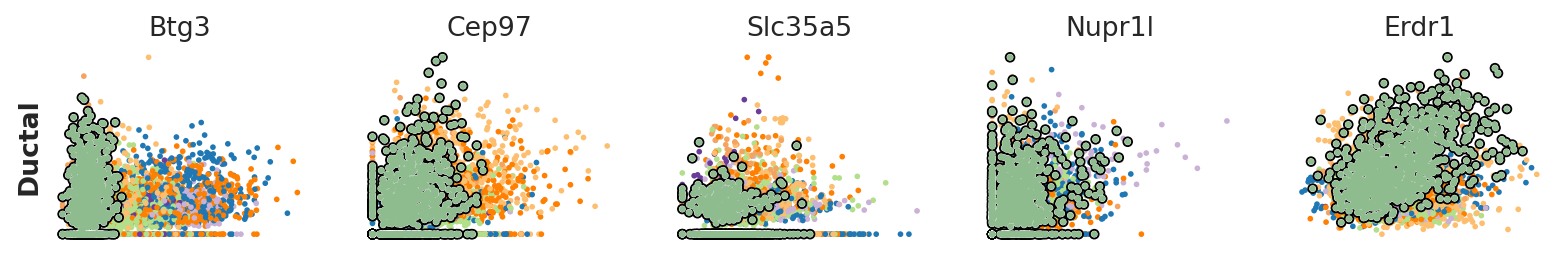

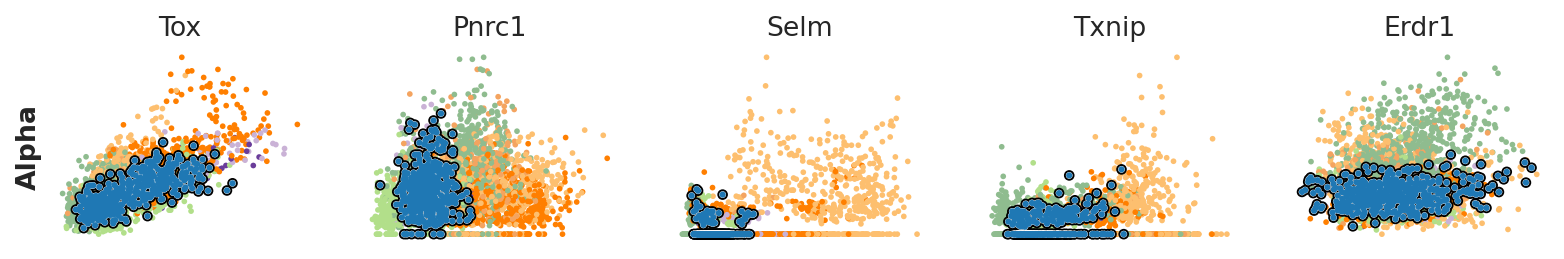

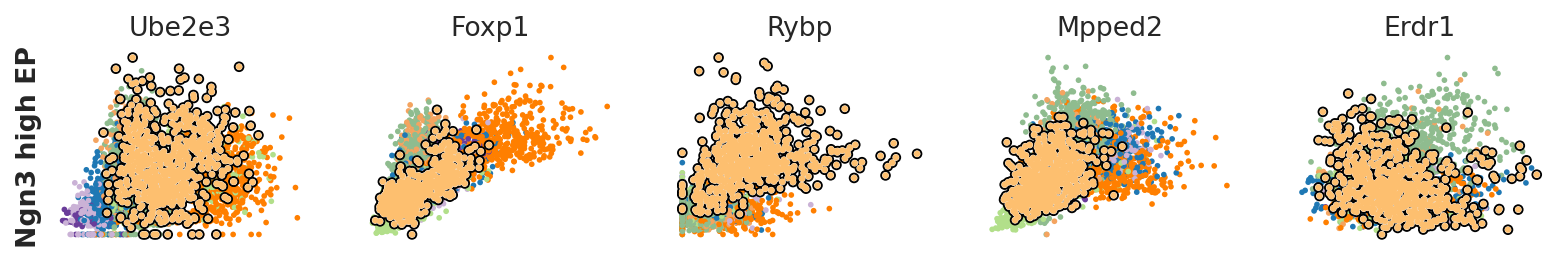

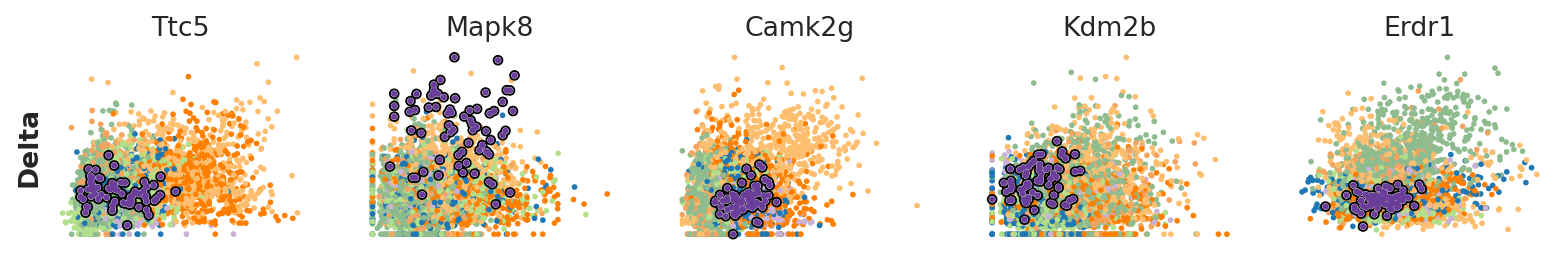

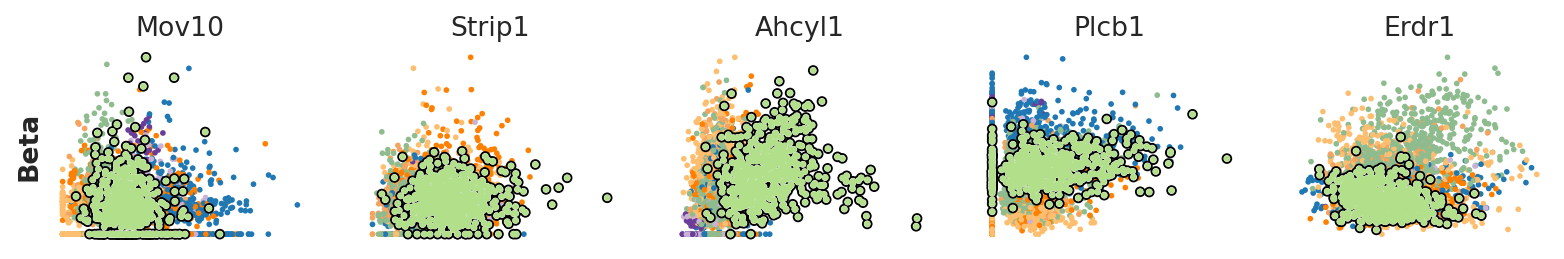

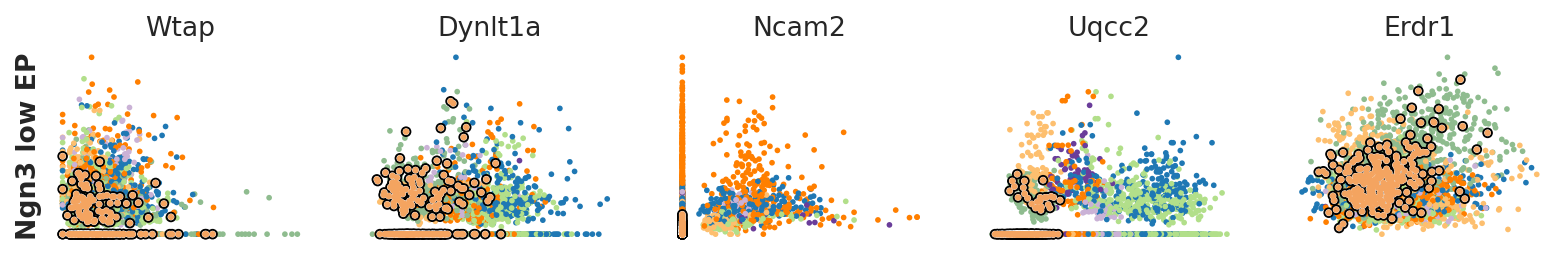

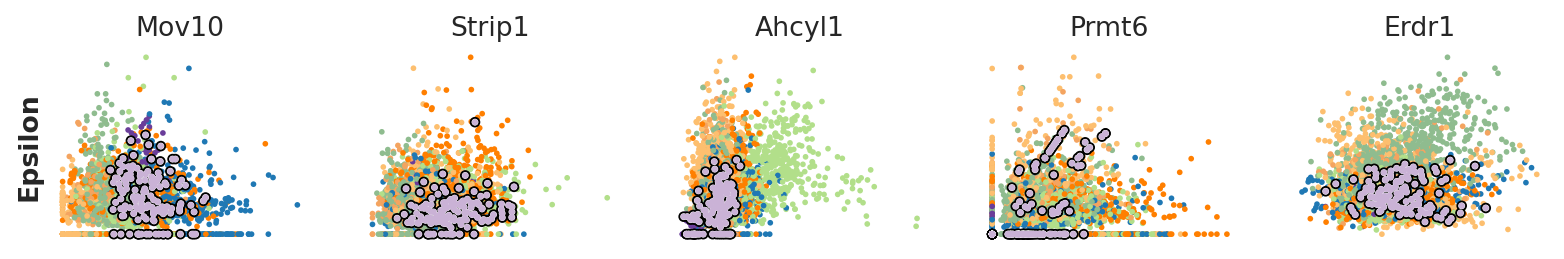

In [20]:
for col in df.columns:
    scv.pl.scatter(oracle.adata, df[col][1995:], ylabel=col, add_outline = col, frameon=False)

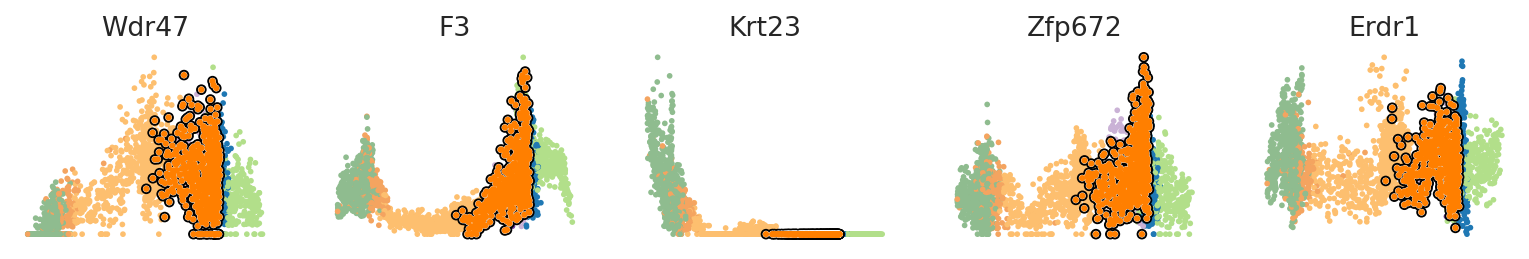

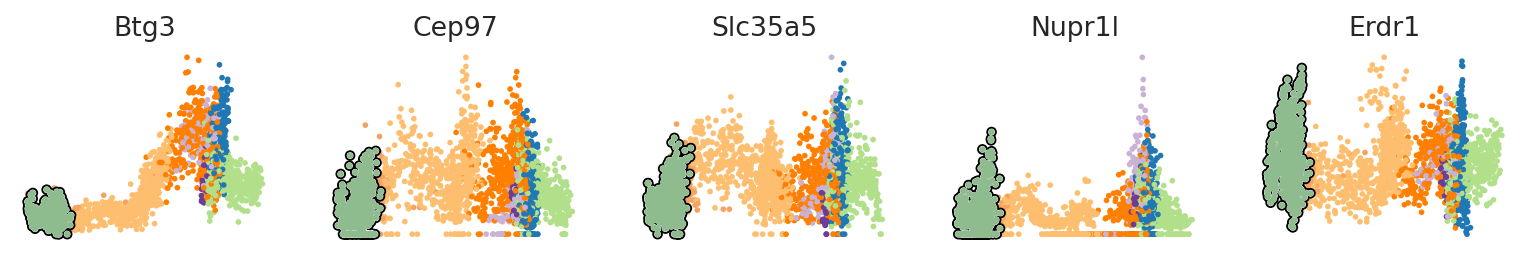

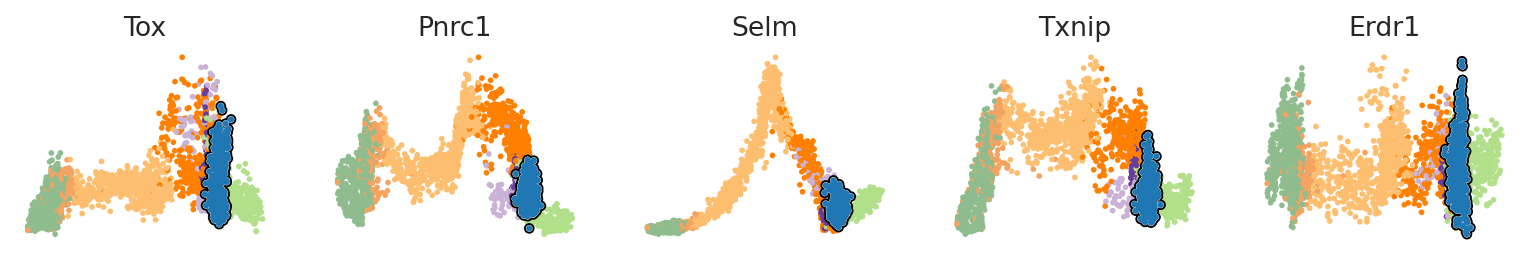

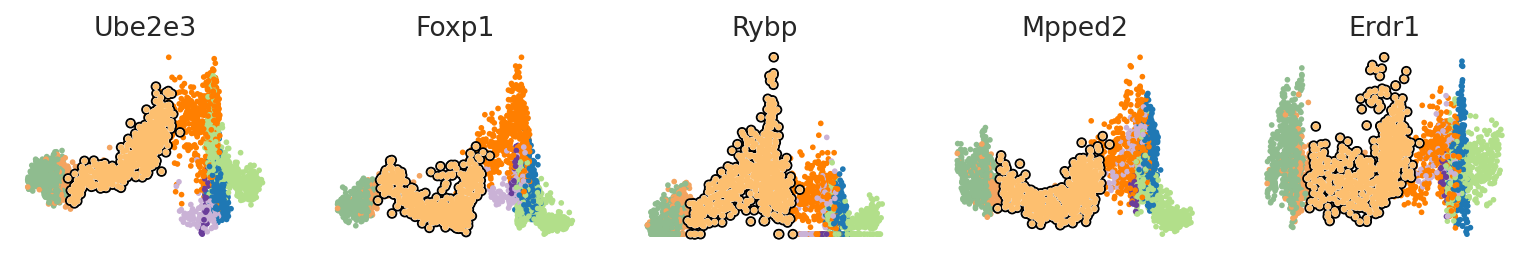

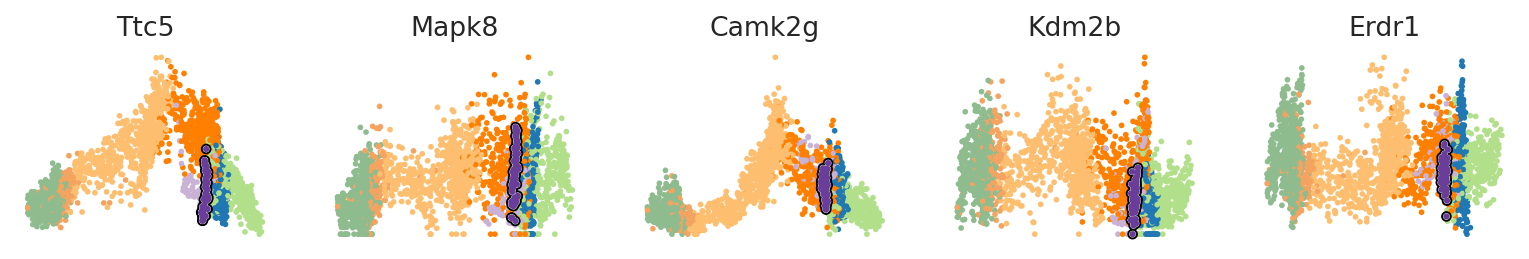

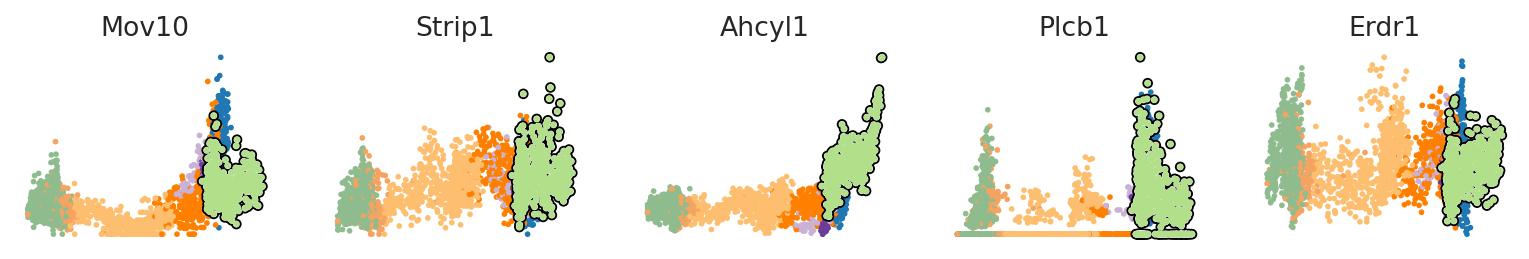

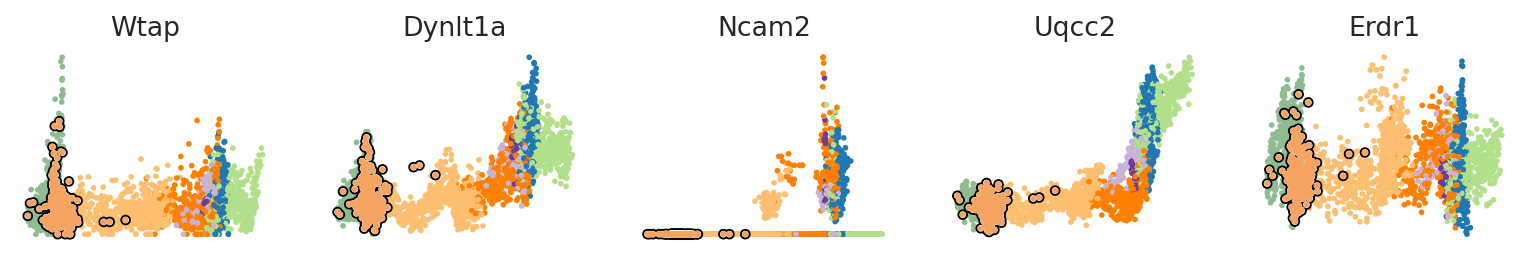

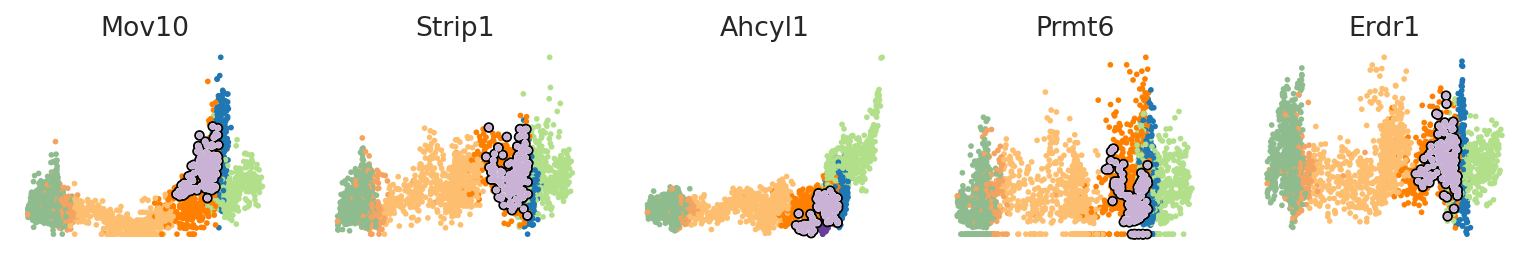

In [21]:
for col in df.columns:
    #scv.pl.scatter(oracle.adata, df[col][:5], ylabel=col, add_outline = col, frameon=False)
    scv.pl.scatter(oracle.adata, x='latent_time', y=list(df[col][1995:]), add_outline = col, frameon=False)

### Relationship spliced and expression

In [22]:
import scipy.sparse

In [23]:
spliced_df = pd.DataFrame.sparse.from_spmatrix(oracle.adata.layers['spliced'], columns = oracle.adata.var.index.values, index=oracle.adata.obs.index.values)
imputed_df = pd.DataFrame(oracle.adata.layers['imputed_count'], columns = oracle.adata.var.index.values, index=oracle.adata.obs.index.values)

In [24]:
np.corrcoef(spliced_df['Mov10'], imputed_df['Mov10'])

array([[1.        , 0.23511413],
       [0.23511413, 1.        ]])

In [25]:
np.corrcoef(spliced_df['Wtap'], imputed_df['Wtap'])

array([[1.        , 0.17382441],
       [0.17382441, 1.        ]])

<AxesSubplot:xlabel='Wtap', ylabel='Wtap'>

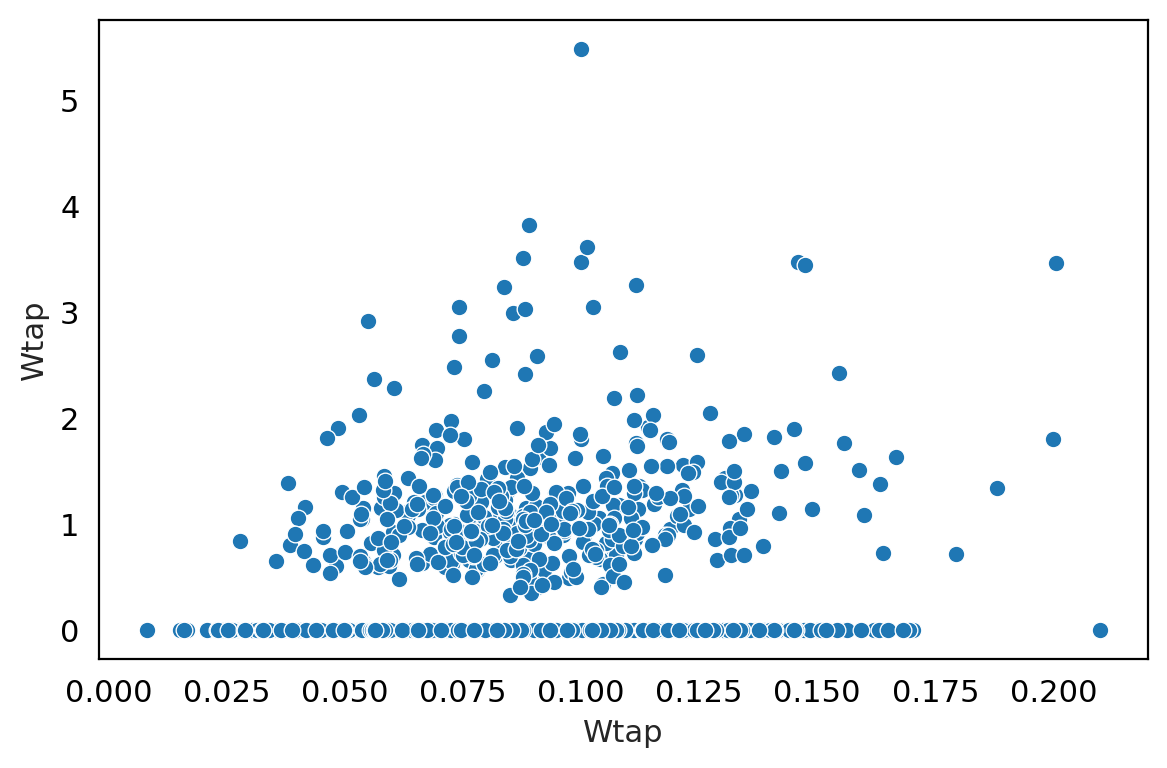

In [26]:
sns.scatterplot(imputed_df['Wtap'], spliced_df['Wtap'])

<AxesSubplot:xlabel='Mov10', ylabel='Mov10'>

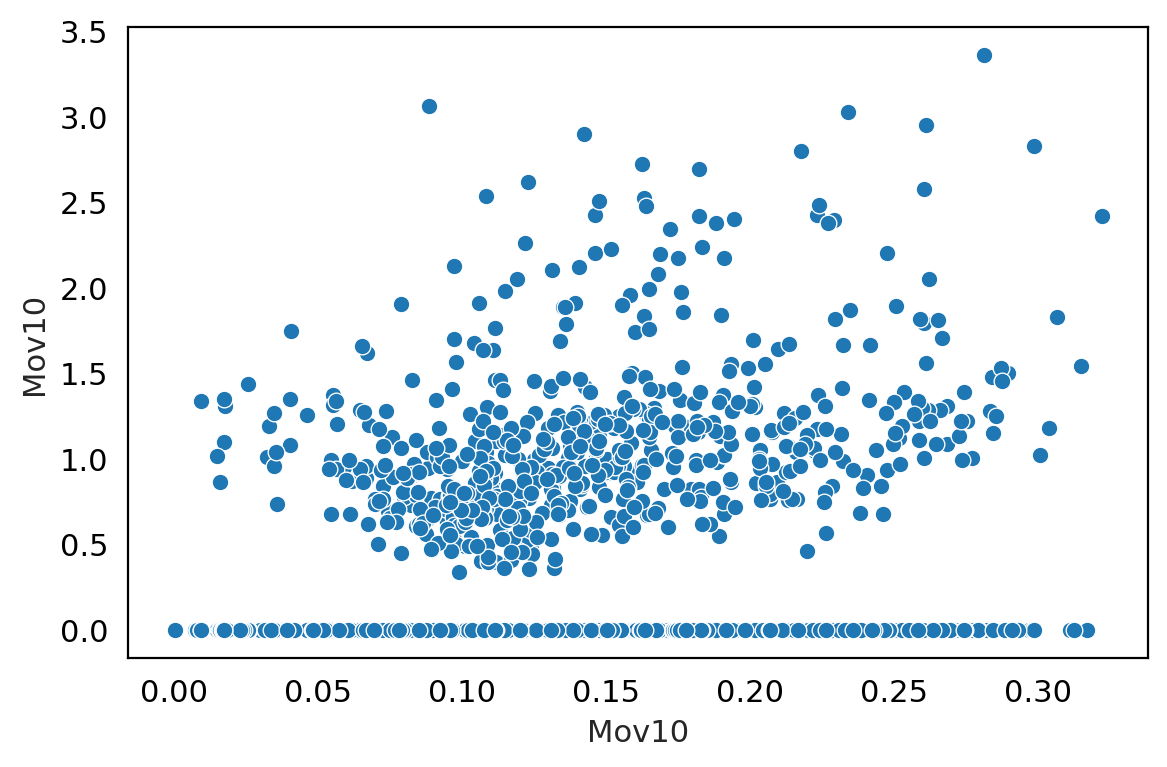

In [27]:
sns.scatterplot(imputed_df['Mov10'], spliced_df['Mov10'])

In [28]:
np.corrcoef(oracle.adata.to_df()['Wtap'],spliced_df['Wtap'])

array([[1.        , 0.98050292],
       [0.98050292, 1.        ]])

<AxesSubplot:xlabel='Wtap', ylabel='Wtap'>

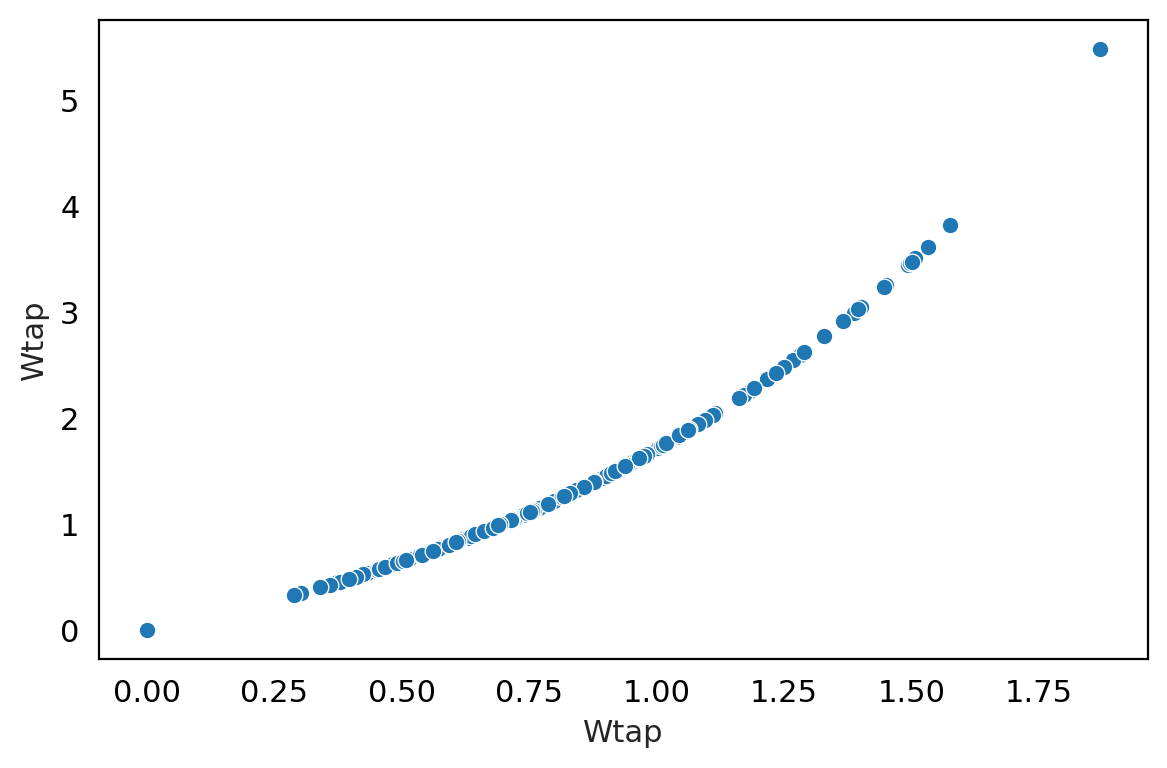

In [29]:
sns.scatterplot(oracle.adata.to_df()['Wtap'], spliced_df['Wtap'])

In [30]:
np.corrcoef(oracle.adata.to_df()['Mov10'],spliced_df['Mov10'])

array([[1.        , 0.98843642],
       [0.98843642, 1.        ]])

<AxesSubplot:xlabel='Mov10', ylabel='Mov10'>

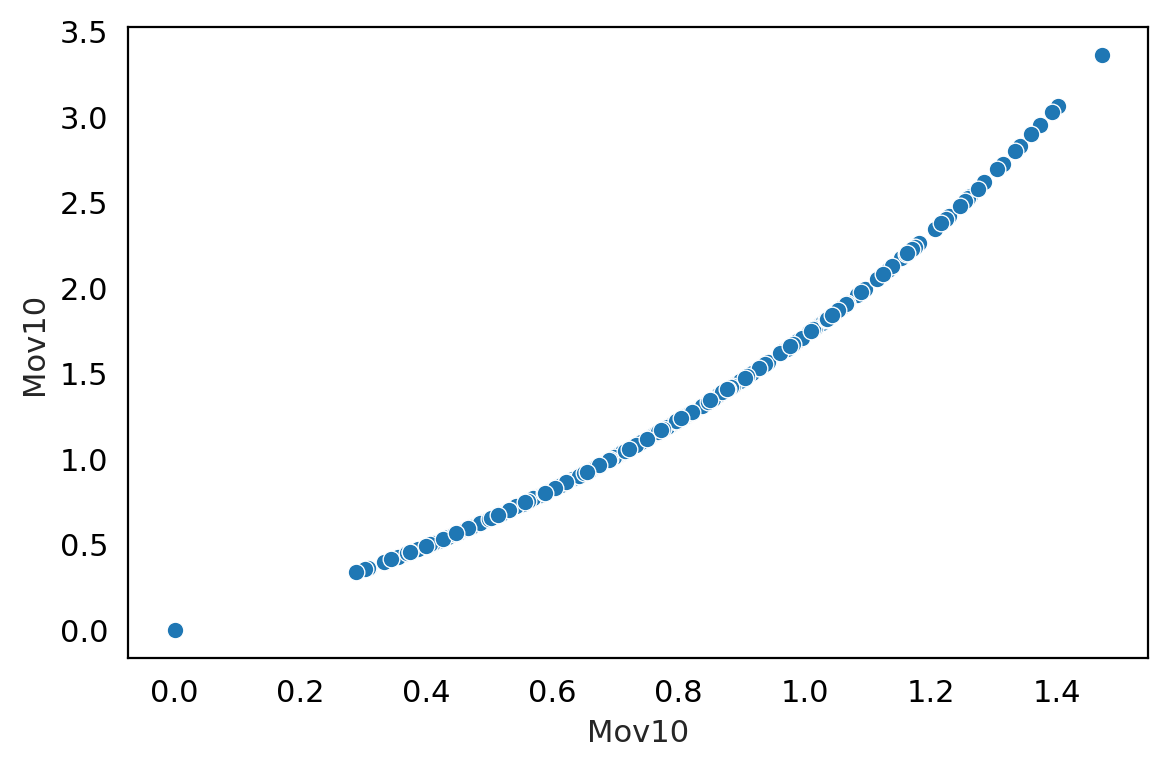

In [31]:
sns.scatterplot(oracle.adata.to_df()['Mov10'], spliced_df['Mov10'])

### TF - target gene delay

In [32]:
oracle.TFdict['0610030E20Rik']

['Atf3',
 'Creb1',
 'Egr1',
 'Ehf',
 'Elf5',
 'Etv1',
 'Etv5',
 'Ezh2',
 'Fev',
 'Mef2a',
 'Mxi1',
 'Zfp143']

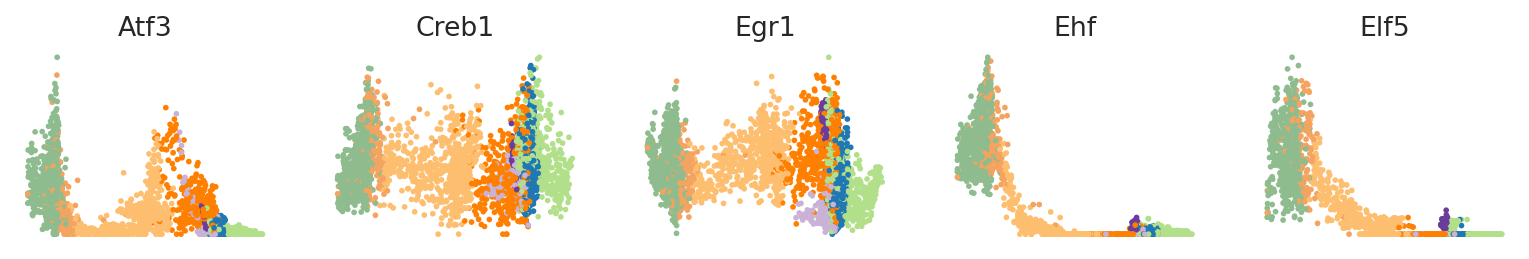

In [33]:
scv.pl.scatter(oracle.adata, x='latent_time', y=oracle.TFdict['0610030E20Rik'][:5], frameon=False)

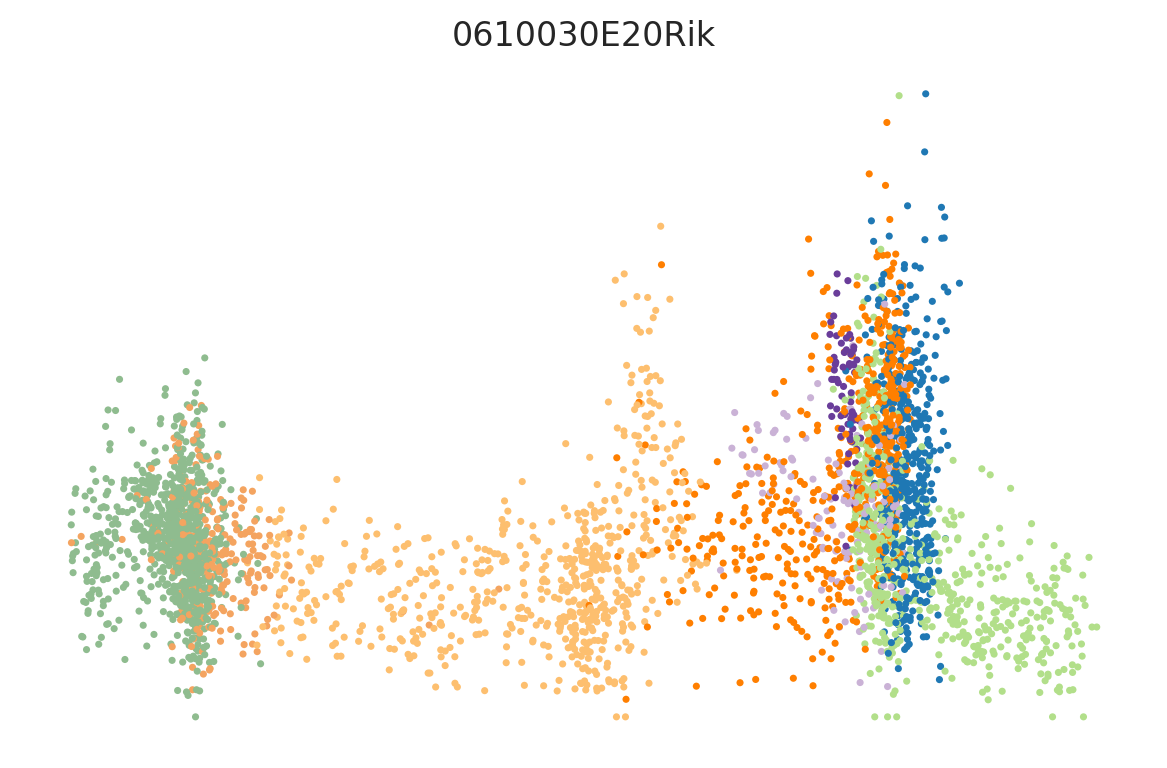

In [34]:
scv.pl.scatter(oracle.adata, x='latent_time', y=['0610030E20Rik'], frameon=False)

<AxesSubplot:xlabel='0610030E20Rik', ylabel='Ehf'>

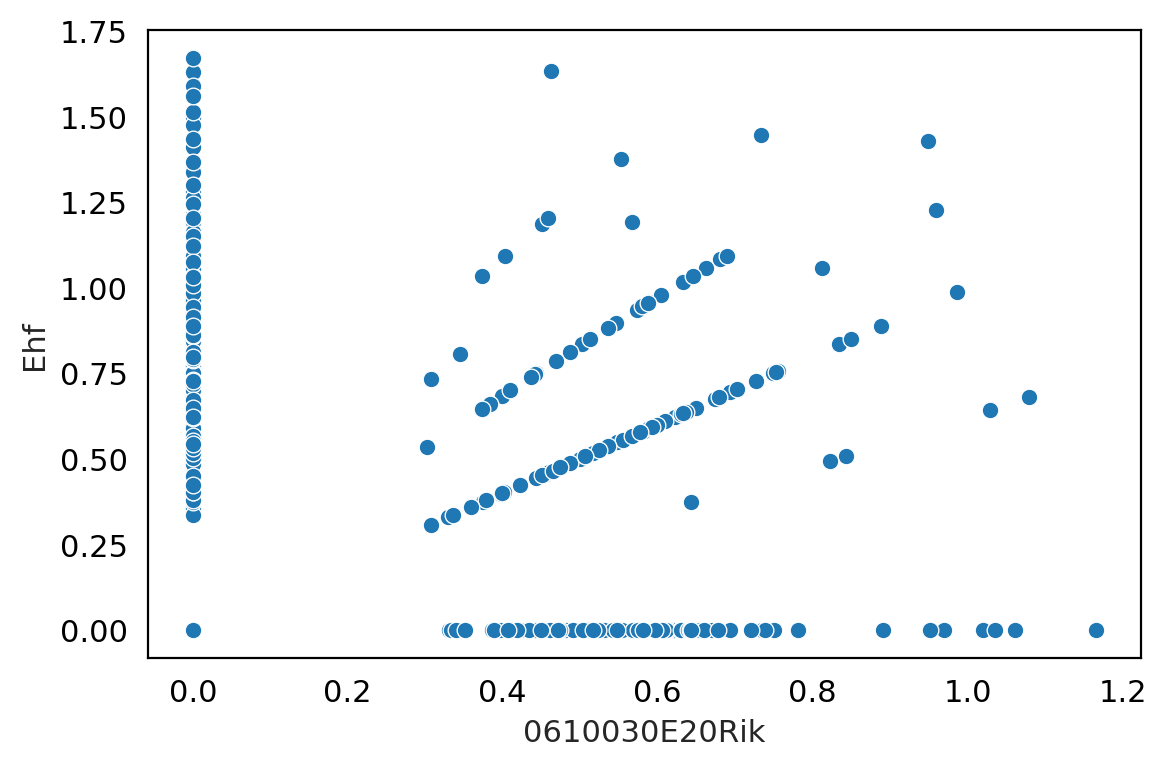

In [35]:
sns.scatterplot(oracle.adata.to_df()['0610030E20Rik'][cluster_info=='Ductal'],oracle.adata.to_df()['Ehf'][cluster_info=='Ductal'])

<AxesSubplot:xlabel='0610030E20Rik', ylabel='Ehf'>

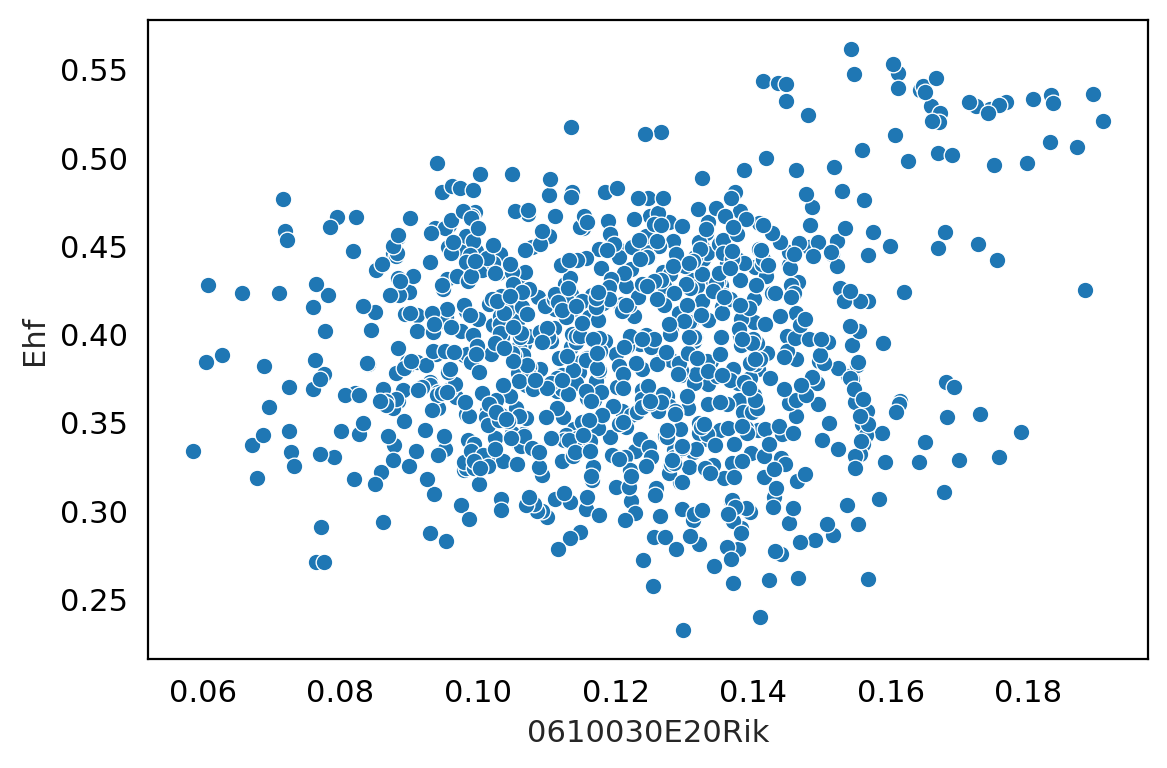

In [36]:
sns.scatterplot(imputed_df['0610030E20Rik'][cluster_info=='Ductal'],imputed_df['Ehf'][cluster_info=='Ductal'])

<AxesSubplot:xlabel='0610030E20Rik', ylabel='Ehf'>

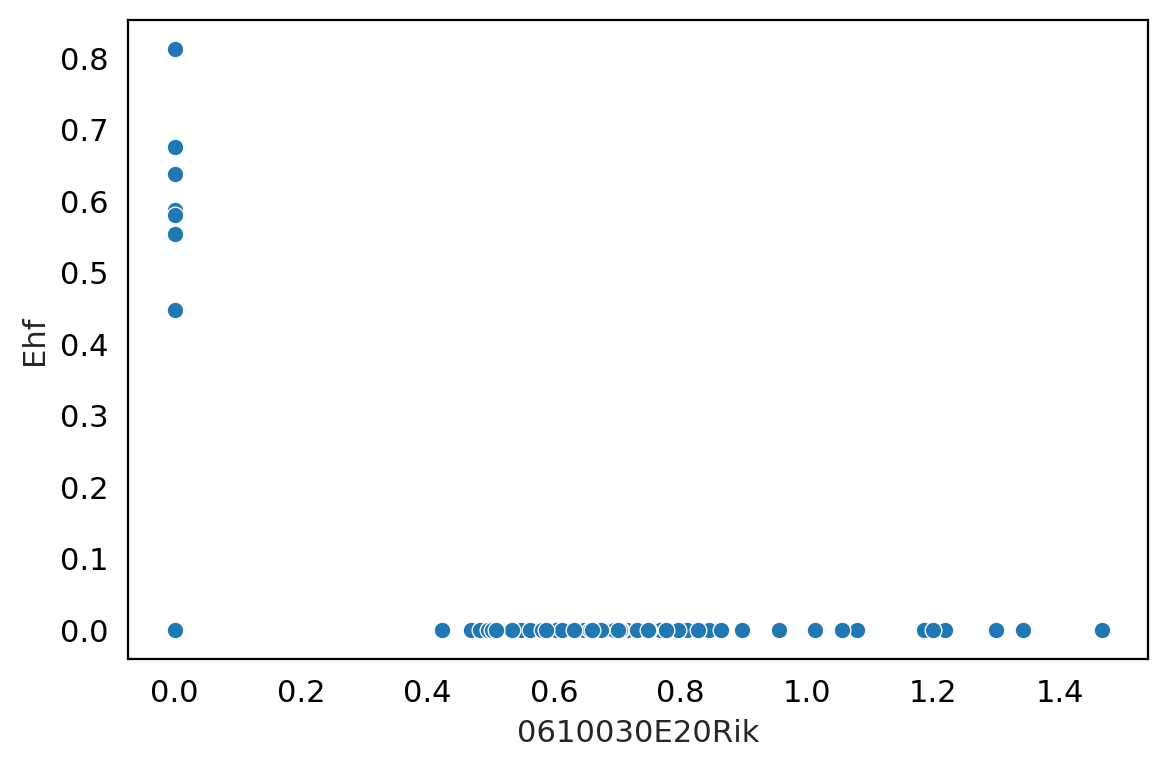

In [37]:
sns.scatterplot(oracle.adata.to_df()['0610030E20Rik'][cluster_info=='Beta'],oracle.adata.to_df()['Ehf'][cluster_info=='Beta'])

<AxesSubplot:xlabel='0610030E20Rik', ylabel='Ehf'>

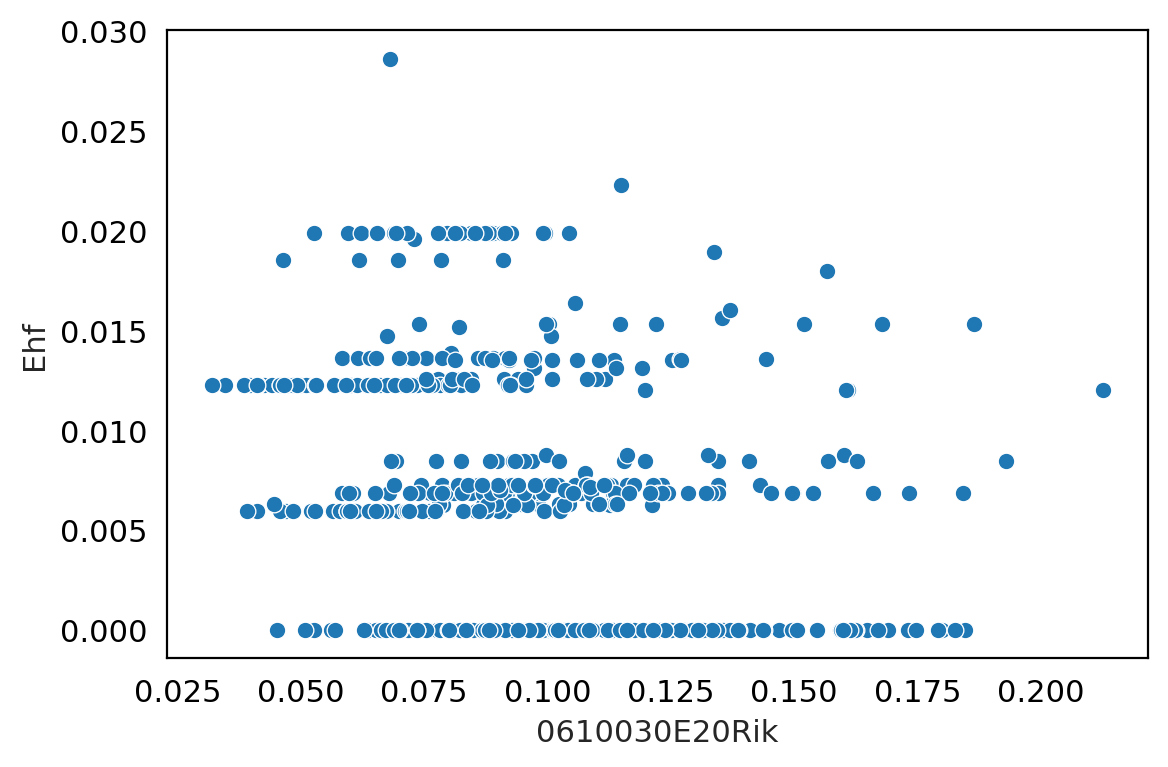

In [38]:
sns.scatterplot(imputed_df['0610030E20Rik'][cluster_info=='Beta'],imputed_df['Ehf'][cluster_info=='Beta'])

<AxesSubplot:xlabel='0610030E20Rik', ylabel='Ehf'>

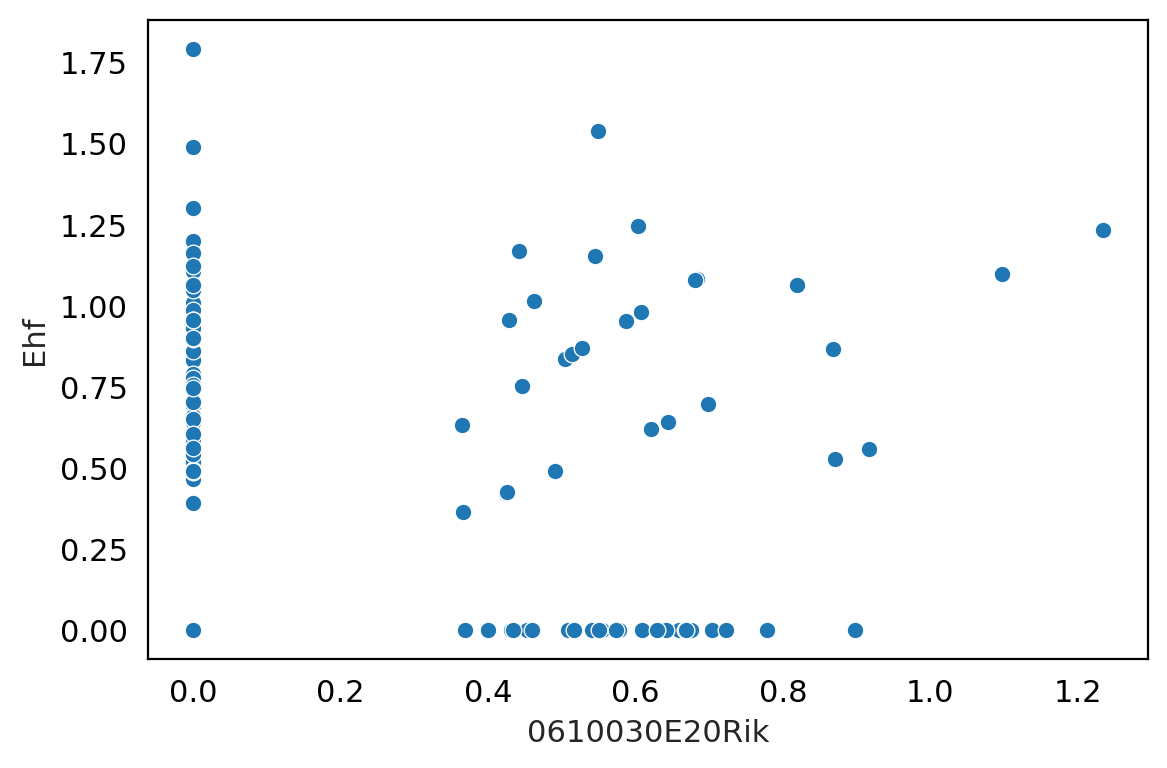

In [39]:
sns.scatterplot(oracle.adata.to_df()['0610030E20Rik'][cluster_info=='Ngn3 low EP'],oracle.adata.to_df()['Ehf'][cluster_info=='Ngn3 low EP'])

<AxesSubplot:xlabel='0610030E20Rik', ylabel='Ehf'>

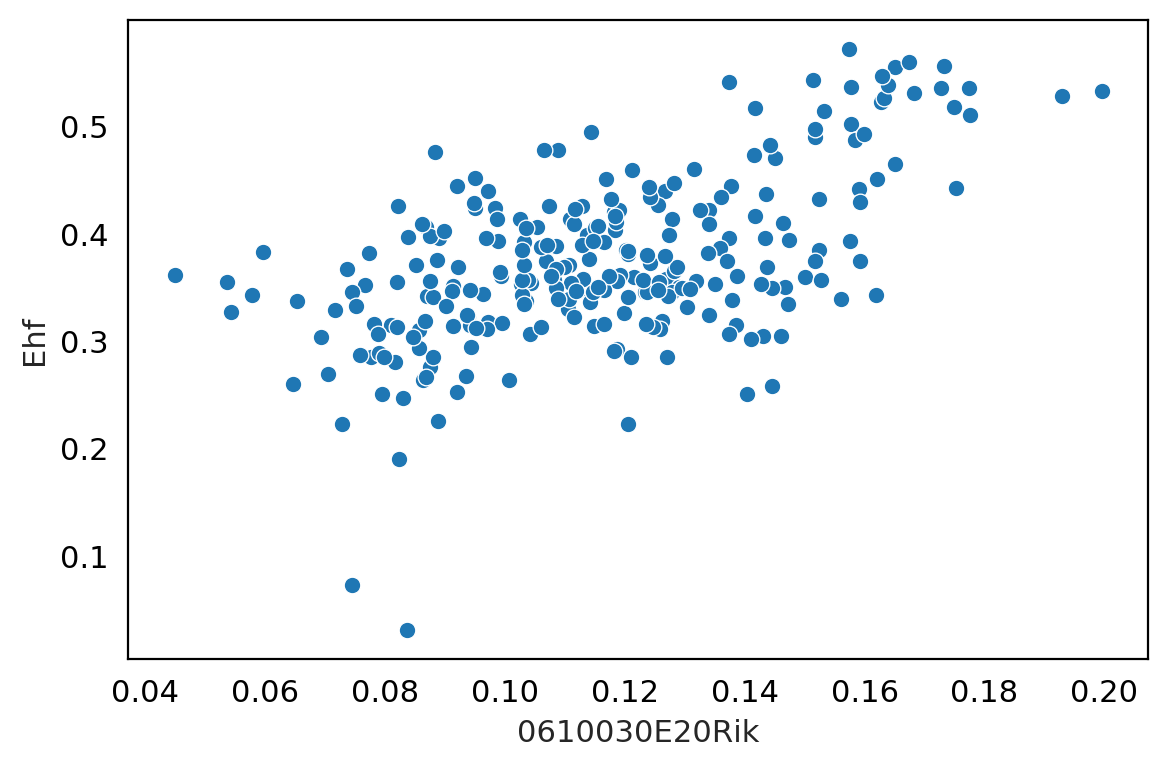

In [40]:
sns.scatterplot(imputed_df['0610030E20Rik'][cluster_info=='Ngn3 low EP'],imputed_df['Ehf'][cluster_info=='Ngn3 low EP'])

<AxesSubplot:xlabel='0610030E20Rik', ylabel='Ehf'>

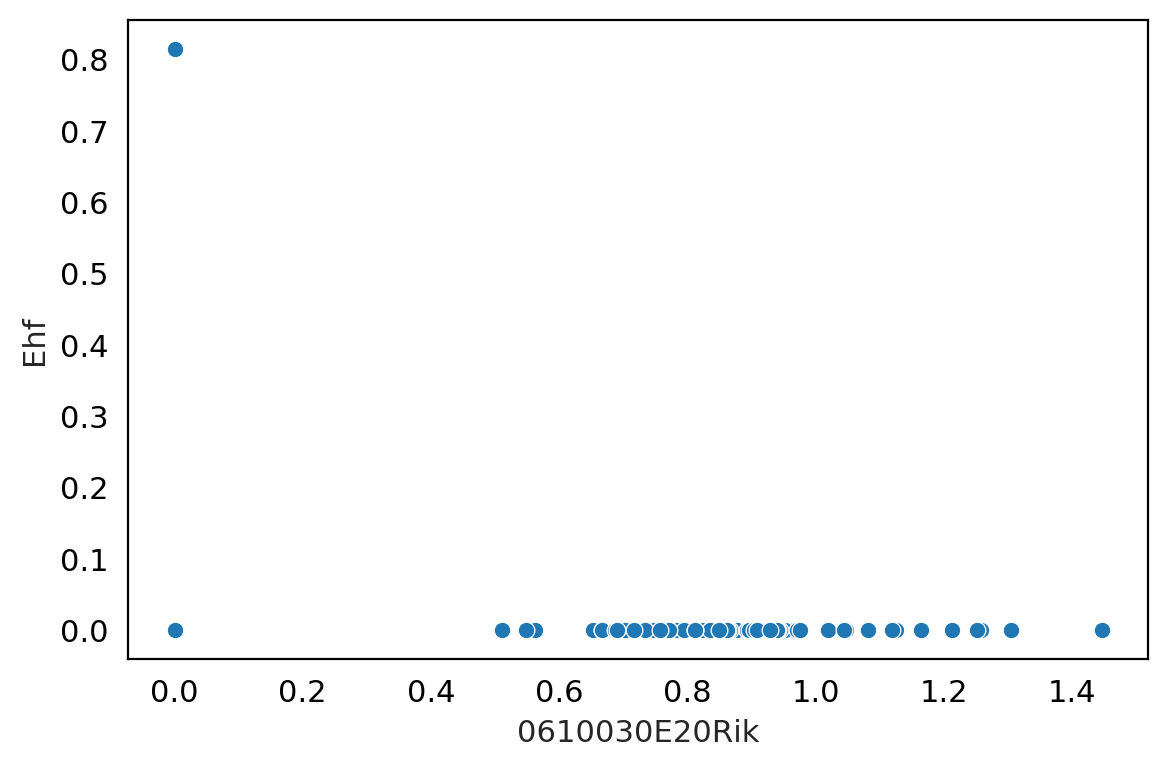

In [41]:
sns.scatterplot(oracle.adata.to_df()['0610030E20Rik'][cluster_info=='Pre-endocrine'],oracle.adata.to_df()['Ehf'][cluster_info=='Pre-endocrine'])

<AxesSubplot:xlabel='0610030E20Rik', ylabel='Ehf'>

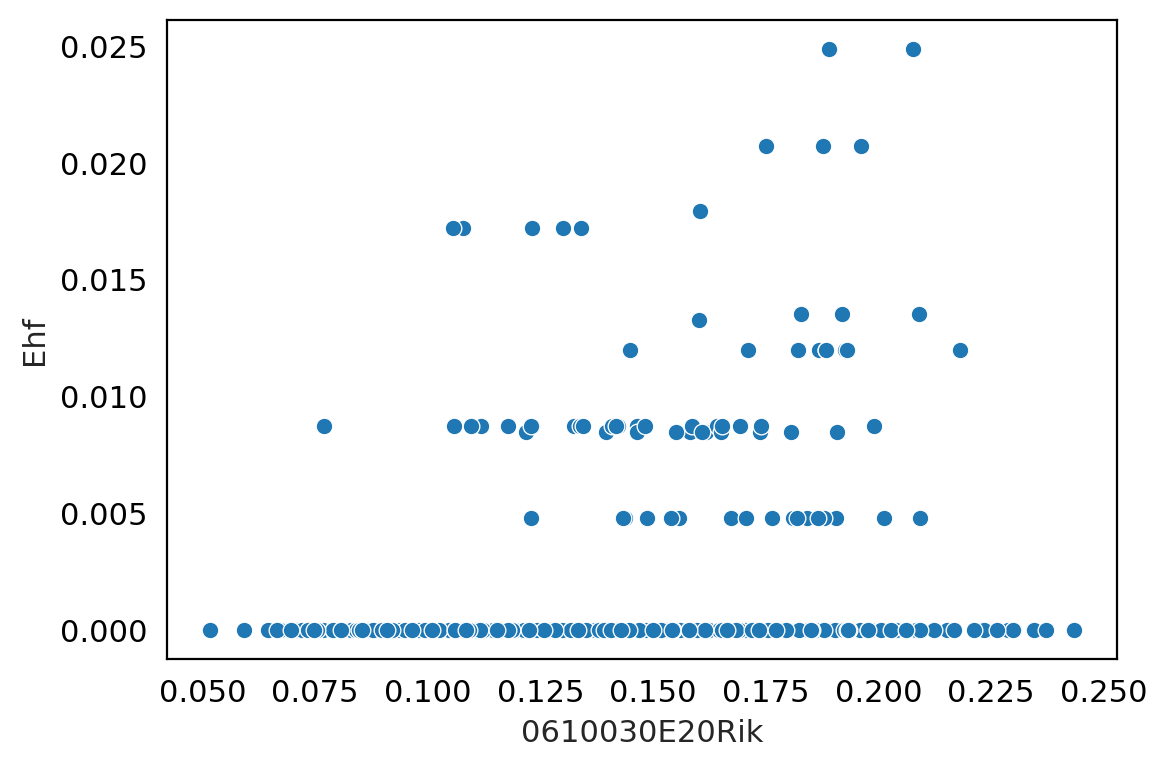

In [42]:
sns.scatterplot(imputed_df['0610030E20Rik'][cluster_info=='Pre-endocrine'],imputed_df['Ehf'][cluster_info=='Pre-endocrine'])